<a href="https://colab.research.google.com/github/RoshanJamthe/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2021. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type (whether movie or tv show) is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Load all the Libraries

In [1]:
"""Getting all the libraries required to run the codes in this notebook"""

############################################################
###         Importing Data Wrangling libraries          ###
############################################################
import numpy as np   
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data visualizations
import matplotlib.cm as cm
# To output the plot inline with the code
%matplotlib inline 
import seaborn as sns
sns.set()         # Alias for set_theme(), which is the preferred interface for seaborn plots
from numpy import math

# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Gets the name of the variable as string
!pip install varname
from varname import nameof

# Import wordcloud
from wordcloud import WordCloud

##############################################################
###         Importing Data preprocessing Libraries         ###
##############################################################
# Using nltk library (arguably best for stopwords and punctuations)
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

# Import lemmatizers
nltk.download('wordnet')  # Have to download the wordnet module
from nltk.stem import WordNetLemmatizer # import wordnetlemmatizer
import spacy # So we can use spacy's lemmatizer

# 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # Normalizer
from sklearn.preprocessing import StandardScaler # Stardardizer

# Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

##############################################################
###  Machine Learning Algorithms - CLUSTERING ANALYSIS     ###
##############################################################
# For clustering
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans  #  k-means clustering algorithm
from sklearn.cluster import MiniBatchKMeans # MiniBatchKMeans clustering algorithm for faster results

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering # Hierarchical clustering

from sklearn.cluster import AffinityPropagation

from sklearn.mixture import GaussianMixture

from sklearn.cluster import SpectralClustering

##############################################################
###     Performance metrics for clustering problem     ###
##############################################################
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score # for scoring on basis of silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#############################################################
###                 Model Interpretation                  ###
#############################################################
# To plot the clusters use the PCA and TSNE modules, import them first!
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage # Import the linkage and dendogram modules for hierarchical clustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Dataset Loading and viewing

## Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset loading
netflix_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# View the data
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# Get feature info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##Handling missing values

In [6]:
#check the missing values in each feature
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are null values in director, cast, country, rating features.

Director feature has most null values.

let's fix the director, cast, and country columns by adding prefix 'No' to the column name in place of missing value.
Then we will drop all the nan rows so we will be missing only 17 rows at max.


In [7]:
# Let's create a copy of the data before messing with a it a little 
df = netflix_data.copy()

In [9]:
# Get rid of untreated index
df = df.reset_index(drop=True)

In [10]:
# Impute 'no_director' in place of missing values in the director column
df['director'] = df['director'].fillna('no_director')

# Impute 'no_cast' in place of missing values in the cast column
df['cast'] = df['cast'].fillna('no_cast')

# Impute 'no_country' in place of missing values in the cast column
df['country'] = df['country'].fillna('no_country')

In [11]:
# Drop the missing rows
df = df.dropna()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
 12  lead_country  7770 non-null   object
 13  lead_actors   7770 non-null   object
dtypes: int64(1), object(13)
memory usage: 910.5+ KB


## Efficient handling of textual features

We will make the words 'one' using underscore in certain columns to handle the strings better.

What we are looking for is the columns where a row can have multiple words in a cell.
Let's find out the column in need of standardization.



In [12]:
df.tail() # Get the last 5 rows of the dataset

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan  no_director   
7785   s7786  TV Show                    Zumbo's Just Desserts  no_director   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                            no_cast   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                         no_country  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [13]:
df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

 The dataset is okay for the Exploratory data analysis but not for the clustering, since we want to include columns such as director, cast, country, etc we should clean it better, I will show you how...

In [14]:
# change 'TV Show' to 'TV_Show' for convience
df['type'] = df['type'].replace({'TV Show':'TV_Show'}) # Clean the type feature ( convert the TV Show to TV_Show, i.e. without space, this way it is good for handling the words)

In [15]:
def break_commas(row):
  """This function joins the names of country, cast, directors and genres by the '_',
  when the stop words and punctuations will be removed, the words will be treated as a single word
  Hence there will be no hindrance while applying countvectorizer or tfidvectorizer,
  otherwise the spaces between the words will treat them as separate entities and we will have extra features"""
  temp_list = [] # Get empty list

  # If no_ is not in the row string
  if 'no_' not in row:
    # Split the string using ',' to get a list of items
    list_of_items = row.split(',')
    
    # Iterate through the list_of_items
    for item in list_of_items:   
      item = item.strip() # Clean the 
      space_break = item.split(" ") # break the item using split(" ")
      temp_list.append('_'.join(space_break)) # join the item with the underscore

    return   ", ".join(temp_list) # join the items in the temp_list with ', ' and return 
  
  # Else just return the row
  else: 
    return row

In [16]:
# Apply the break_commas function to director, cast, country, listed_in

df['director'] = df['director'].apply(break_commas)

df['cast'] = df['cast'].apply(break_commas)

df['country'] = df['country'].apply(break_commas)

df['listed_in'] = df['listed_in'].apply(break_commas)

# View the change
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef_Fares   
7783   s7784    Movie                                   Zubaan  Mozez_Singh   
7784   s7785    Movie                        Zulu Man in Japan  no_director   
7785   s7786  TV_Show                    Zumbo's Just Desserts  no_director   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam_Dunn   

                                                   cast  \
7782  Imad_Creidi, Antoinette_Turk, Elias_Gergi, Car...   
7783  Vicky_Kaushal, Sarah-Jane_Dias, Raaghav_Chanan...   
7784                                            Nasty_C   
7785                         Adriano_Zumbo, Rachel_Khoo   
7786                                            no_cast   

                                                country          date_added  \
7782  Sweden, Czech_Republic, United_Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                         no_country  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United_Kingdom, Canada, United_States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International_Movies   
7783     Dramas, International_Movies, Music_&_Musicals   
7784  Documentaries, International_Movies, Music_&_M...   
7785                 International_TV_Shows, Reality_TV   
7786                    Documentaries, Music_&_Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [17]:
def lead_country(row):
  """Function returns the first country name from the list of country"""
  temp_list = [] # Get empty list

  # If no_ is not in the row string
  if 'no_' not in row:
    # Split the string using ',' to get a list of items
    list_of_items = row.split(',')
    
    # First item in list_of_items 
    item = list_of_items[0].strip() # Clean the item
    space_break = item.split(" ") # break the item using split(" ")
    return '_'.join(space_break) # join the item with the underscore

  # Else just return the row
  else: 
    return row

# Make a lead_country column in df
df['lead_country'] = df['country'].apply(lead_country)

In [18]:
def top_actors(row):
  """Function returns the top 3 actor name from the list of cast"""
  temp_list = [] # Get empty list

  # If no_ is not in the row string
  if 'no_' not in row:
    # Split the string using ',' to get a list of items
    list_of_items = row.split(',')
    
    # First item in list_of_items 
    return ' '.join(list_of_items[:3]) # join the item with the underscore

  # Else just return the row
  else: 
    return row

# Make a lead_actors column in df
df['lead_actors'] = df['cast'].apply(top_actors)

In [19]:
# Check out last 5 rows from the df 
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef_Fares   
7783   s7784    Movie                                   Zubaan  Mozez_Singh   
7784   s7785    Movie                        Zulu Man in Japan  no_director   
7785   s7786  TV_Show                    Zumbo's Just Desserts  no_director   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam_Dunn   

                                                   cast  \
7782  Imad_Creidi, Antoinette_Turk, Elias_Gergi, Car...   
7783  Vicky_Kaushal, Sarah-Jane_Dias, Raaghav_Chanan...   
7784                                            Nasty_C   
7785                         Adriano_Zumbo, Rachel_Khoo   
7786                                            no_cast   

                                                country          date_added  \
7782  Sweden, Czech_Republic, United_Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                         no_country  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United_Kingdom, Canada, United_States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International_Movies   
7783     Dramas, International_Movies, Music_&_Musicals   
7784  Documentaries, International_Movies, Music_&_M...   
7785                 International_TV_Shows, Reality_TV   
7786                    Documentaries, Music_&_Musicals   

                                            description    lead_country  \
7782  When Lebanon's Civil War deprives Zozo of his ...          Sweden   
7783  A scrappy but poor boy worms his way into a ty...           India   
7784  In this documentary, South African rapper Nast...      no_country   
7785  Dessert wizard Adriano Zumbo looks for the nex...       Australia   
7786  This documentary delves into the mystique behi...  United_Kingdom   

                                          lead_actors  
7782        Imad_Creidi  Antoinette_Turk  Elias_Gergi  
7783  Vicky_Kaushal  Sarah-Jane_Dias  Raaghav_Chanana  
7784                                          Nasty_C  
7785                       Adriano_Zumbo, Rachel_Khoo  
7786                                          no_cast

Now, the data looks better!

It will be easier to retrieve a single name from such columns, that will save us lot of trouble. Also, the complete name will be together even we remove stopwords and make vectorization. This will help make the clustering more accurate.

## Check for duplicates

In [20]:
df.duplicated().sum()  # Check for duplicates

0

In [21]:
# Check out unique values in each columns
for col in df.columns:
  print(f'{col} has {df[col].nunique()} unique values : /n{df[col].unique()}')
  print('**'*40)

show_id has 7770 unique values : /n['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
********************************************************************************
type has 2 unique values : /n['TV_Show' 'Movie']
********************************************************************************
title has 7770 unique values : /n['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
********************************************************************************
director has 4048 unique values : /n['no_director' 'Jorge_Michel_Grau' 'Gilbert_Chan' ... 'Josef_Fares'
 'Mozez_Singh' 'Sam_Dunn']
********************************************************************************
cast has 6818 unique values : /n['João_Miguel, Bianca_Comparato, Michel_Gomes, Rodolfo_Valente, Vaneza_Oliveira, Rafael_Lozano, Viviane_Porto, Mel_Fronckowiak, Sergio_Mamberti, Zezé_Motta, Celso_Frateschi'
 'Demián_Bichir, Héctor_Bonilla, Oscar_Serrano, Azalia_Ortiz, Oc

# Exploratory Data Analysis

### Does Netflix has more Movies than TV Shows?

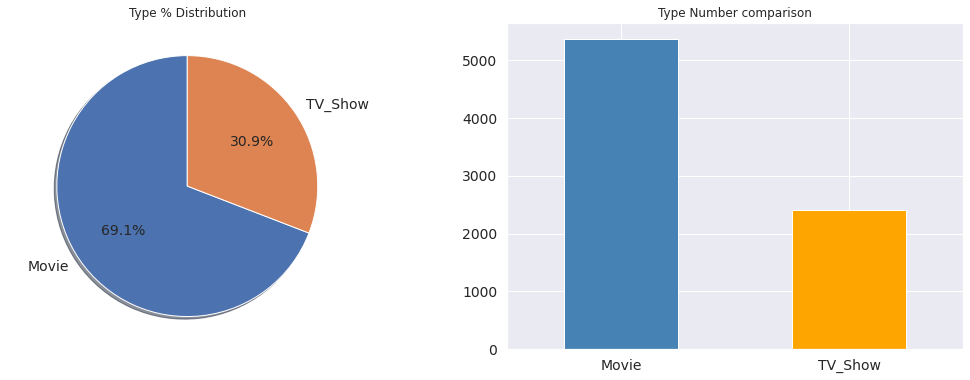

In [58]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
df['type'].value_counts().plot(kind='pie',fontsize=14, autopct='%1.1f%%',shadow=True, startangle=90,label= " ",title='Type % Distribution') # Get the pie plot of content distribution

plt.subplot(1,2,2)
df['type'].value_counts().plot(kind='bar',title='Type Number comparison',fontsize=14,grid=True,color=['steelblue','orange']) # Get the bar plot to compare the numbers
plt.xticks(rotation=0)
plt.show()

#### Inference: Yes, Movies on Netflix are more than twice in number than TV shows. And TV Shows have long way to go to catch upto that number

### Comment on trend of content addition after 2010

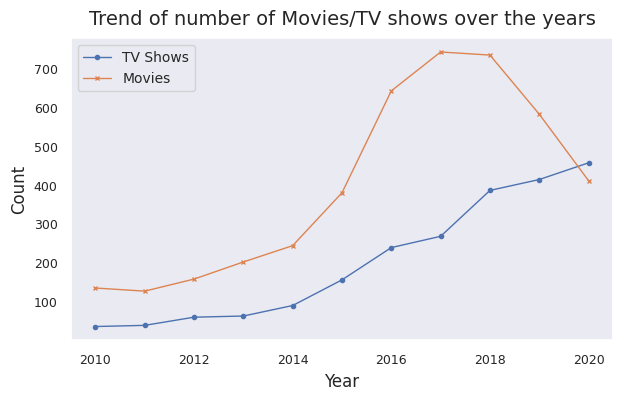

In [59]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(df[(df['type']=='TV_Show') & (df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='o',markersize=3,linewidth=1,label='TV Shows') # Trend of tv shows
ax.plot(df[(df['type']=='Movie')& (df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='x',markersize=3,linewidth=1,label='Movies') # Trend of movies

ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax.grid(None)
ax.set_title('Trend of number of Movies/TV shows over the years',fontsize=14,pad=10)
ax.legend(fontsize=10)
plt.show()

#### Inference: It is clear from the plot that from past five years, the focus from the Movies has been shifted towards TV shows. Number of movies featured were reduced from ~740 in 2017 to ~410 in 2020 while number of TV Shows increased continuously from ~270 in 2017 to ~460 in 2020.

From past five years, Netflix has shifted its focus towards TV shows. Number of movies added to Netflix reduced by 45% while number of TV Shows added increased by 70%.

### Type - Country relationship, Understanding what type (whether movie or tv show) is available in different countries 

In [60]:
country_data = [] # Get all the occurences of countries in country feature in this list

# Iterate through the list of country feature
for string in df[df['country']!='no_country']['country'].tolist():

  # Split the string using ',' to get a list of countries where the content was shoot 
  temp = string.split(',')
  # Apeend the first country's name
  country_data.append(temp[0].strip())

In [61]:
# Get a copy of df
country_df = df[df['country']!='no_country'].copy()

# Create a main_country column
country_df['main_country'] = country_data

In [62]:
# Select main_country, type and any other non-null feature(we will take count of this feature)
country_type = country_df[['show_id','type','main_country']].groupby(['main_country','type']).count().reset_index() # Groupby on main_country and type

# Check out country_type dataframe
country_type.head()

main_country     type  show_id
0    Argentina    Movie       50
1    Argentina  TV_Show       18
2    Australia    Movie       56
3    Australia  TV_Show       50
4      Austria    Movie        7

In [63]:
# Use pivot function, to create a table of index = country, columns = type, values = show_id(count)
country_type_pivoted = country_type.pivot('main_country', 'type', 'show_id').fillna(0).sort_values(['Movie','TV_Show'],ascending=False).reset_index()

# Check out country_type_pivoted dataframe
country_type_pivoted['total'] = country_type_pivoted['Movie'] + country_type_pivoted['TV_Show']

country_type_pivoted.sort_values('total',ascending=False,inplace=True)

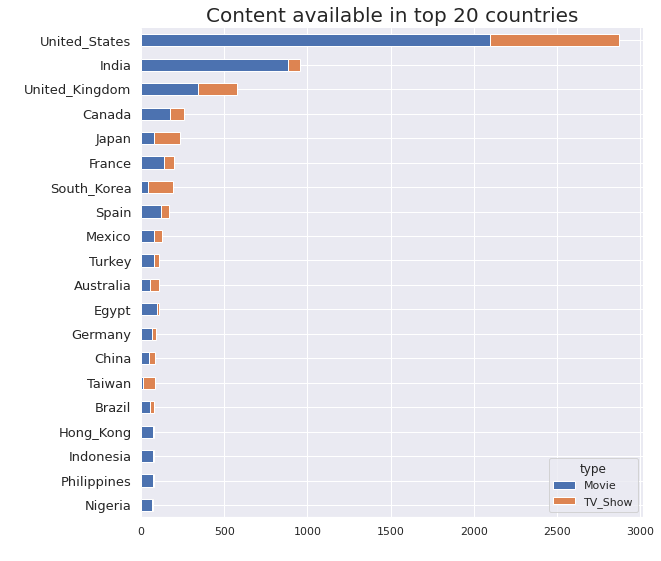

In [64]:
# Plot the content available in top 20 countries using country_type_pivoted dataframe
country_type_pivoted.drop('total',axis=1)[:20][::-1].set_index('main_country').plot(kind='barh', stacked=True, figsize=(9,9))
plt.xlabel(" ")
plt.ylabel(" ")
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title("Content available in top 20 countries", fontsize=20)
plt.show()

#### Inference: Netflix is dominated by the United States movies and tv shows, they are also leading in actual number of content produced. 

Countries like Japan, South Korea has more focus on TV Shows than on Movies. 

India has remarkably low popular TV Shows content when compared with the popular movies the country had made till now. 

### Content addition trend of India and South Korea 

In [65]:
India_df = country_df[(country_df['main_country']=='India')]  # Get data for only India country
southkorea_df = country_df[(country_df['main_country']=='South_Korea')]  # Get data for only South Korea country

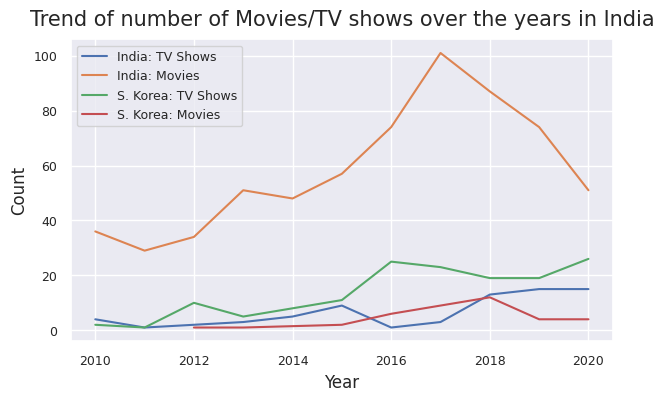

In [66]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(India_df[(India_df['type']=='TV_Show') & (India_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1],label='India: TV Shows') # Trend of tv shows : India
ax.plot(India_df[(India_df['type']=='Movie')& (India_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count(), label='India: Movies') # Trend of movies : India

ax.plot(southkorea_df[(southkorea_df['type']=='TV_Show') & (southkorea_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count(),label='S. Korea: TV Shows') # Trend of tv shows : S. Korea
ax.plot(southkorea_df[(southkorea_df['type']=='Movie')& (southkorea_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], label='S. Korea: Movies') # Trend of movies : S. Korea
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax.set_title('Trend of number of Movies/TV shows over the years in India',fontsize=15,pad=10)
ax.legend(fontsize=9)
plt.show()

#### Inference : In Past 5 years, more of Indian TV Shows content is getting featured on Netflix and the number is only increasing. But the number of Movies added per year is decreasing. There is a vast difference in number of movies these countries release per year. South Korea is releasing ~20 tv shows per year from last 5 years.

South Korean TV Shows are more popular than Indian TV Shows while Indian Movies are more popular.

### Top 20 Most featured Directors

In [67]:
director_data = [] # Get all the occurences of directors in cast feature in this list

# Iterate through the list of director feature
for string in df[df['director']!='no_director']['director'].tolist():

  # Split the string using ',' to get a list of directors 
  temp = string.split(',')
  
  # Iterate through that list of directors
  for director in temp:
    # Apeend the directors 
    director_data.append(director.strip())

In [68]:
director_df = pd.Series(director_data) # Create a series using director_data list

In [69]:
director_df.value_counts() # Get the value_counts of directors

Jan_Suter              21
Raúl_Campos            19
Marcus_Raboy           16
Jay_Karas              15
Cathy_Garcia-Molina    13
                       ..
Sajid_Khan              1
Lucy_van_Beek           1
Remi_Weekes             1
Jennifer_Lynch          1
Mozez_Singh             1
Length: 4476, dtype: int64

In [70]:
top_20_directors = director_df.value_counts()[:20] # Get top 20 directors

Text(0.5, 1.0, 'Top 20 directors based on content')

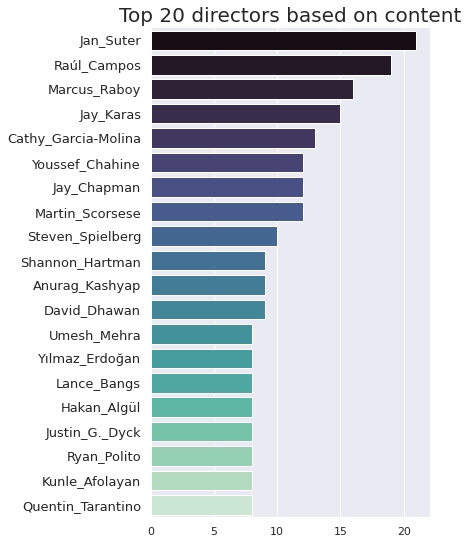

In [71]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_directors.index, x=top_20_directors,palette="mako",orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 directors based on content',fontsize=20)

#### Inference: Jan Suter is the most featured director. Raul Campos and Jan Suter together directed 18 movies. We can observe some other great names such as Jay Chapman, Martin Scorsese and Steven Spielberg.

### Top 20 Most featured actors

In [72]:
actor_data = [] # Get all the occurences of actors in cast feature in this list

# Iterate through the list of actor feature
for string in df[df['cast']!='no_cast']['cast'].tolist():

  # Split the string using ',' to get a list of actors 
  temp = string.split(',')
  
  # Iterate through that list of actors
  for actor in temp:
    # Append the actor
    actor_data.append(actor.strip())

In [73]:
actor_df = pd.Series(actor_data) # Create a series using actor_data list

In [74]:
actor_df.value_counts() # Get the value_counts of actors

Anupam_Kher         42
Shah_Rukh_Khan      35
Naseeruddin_Shah    30
Om_Puri             30
Takahiro_Sakurai    29
                    ..
Mylene_Dizon         1
Lorenz_Martinez      1
Art_Acuña            1
Archie_Alemania      1
Rachel_Khoo          1
Length: 32836, dtype: int64

In [75]:
top_20_actors = actor_df.value_counts()[:20] # Get top 20 directors

Text(0.5, 1.0, 'Top 20 actors based on content')

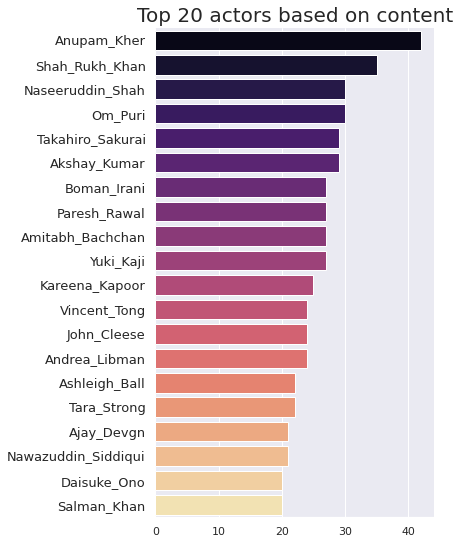

In [76]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_actors.index, x=top_20_actors,palette='magma',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 actors based on content',fontsize=20)

#### Inference: Most featured actor is Anupam Kher featured in 42 movies. Out of top 10 actors, 8 are Indians. It shows the impact of Indian actors on the World television industry. Some great names like Amitabh Bachchan, Shahrukh Khan, Akshay Kumar and Paresh Rawal is also in top 10 active actors.

### Get top 20 genres


In [77]:
genre_data = [] # Get all the occurences of genres in listed_in feature in this list

# Iterate through the list of genre feature
for string in df['listed_in'].tolist():
  # Split the string using ',' to get a list of genres
  temp = string.split(',')
  # Iterate through that list of genres
  for genre in temp:
    # Append the genre
    genre_data.append(genre.strip()) # stripping the genre of the leading whitespaces

In [78]:
genre_df = pd.Series(genre_data) # Create a series using actor_data list

In [79]:
len(genre_df.value_counts())

42

In [80]:
genre_df.value_counts()[:5] # get top 15 genres

International_Movies      2437
Dramas                    2105
Comedies                  1471
International_TV_Shows    1197
Documentaries              786
dtype: int64

In [81]:
top_20_genres = genre_df.value_counts()[:20] # Get top 20 directors

Text(0.5, 1.0, 'Top 20 genres based on content')

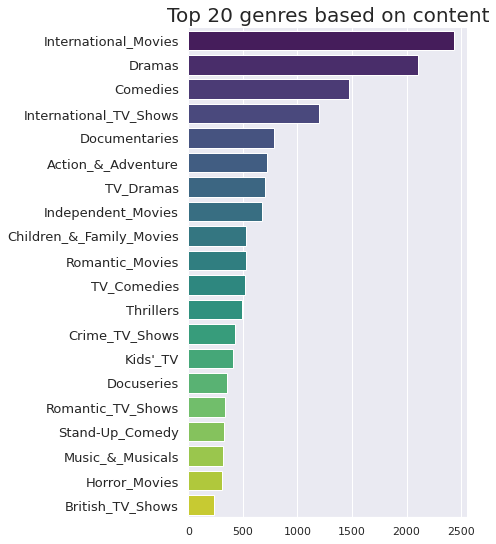

In [82]:
plt.figure(figsize=(5,9))
ax = sns.barplot(y=top_20_genres.index, x=top_20_genres,palette='viridis',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Top 20 genres based on content',fontsize=20)

#### Inference: International movies is the top genre followed by Dramas and Comedies.

We love dramas and comedies, don't we?

O how come action and adventure is below documentaries, so netflix is keeping a lot of real life based content.

### Get content duration distribution

In [83]:
# Create a new dataframe for the analysis using features type and duration
duration = df[['type','duration']].copy()
duration.head()

type   duration
0  TV_Show  4 Seasons
1    Movie     93 min
2    Movie     78 min
3    Movie     80 min
4    Movie    123 min

In [84]:
duration['length']=duration['duration'].apply(lambda x: x.split(" ")[0]) # Get length of seasons and movie duration

In [85]:
duration.head() # Check the change

type   duration length
0  TV_Show  4 Seasons      4
1    Movie     93 min     93
2    Movie     78 min     78
3    Movie     80 min     80
4    Movie    123 min    123

Text(0.5, 1.0, 'TV show duration Distribution')

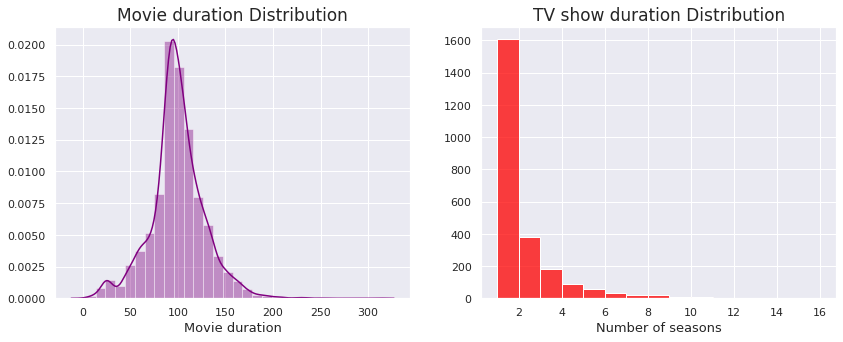

In [86]:
# Plot movie length duration
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(duration[duration['type']=='Movie']['length'],hist=True, bins=30,color='purple')
plt.ylabel('',fontsize=13)
plt.xlabel('Movie duration',fontsize=13)
plt.title('Movie duration Distribution',fontsize=17)

# Plot tv shows season length duration
plt.subplot(1,2,2)
sns.histplot(duration[duration['type']=='TV_Show']['length'].astype(int).sort_values(ascending=True),binwidth=1,color='red')
plt.ylabel('',fontsize=13)
plt.xlabel('Number of seasons',fontsize=13)
plt.title('TV show duration Distribution',fontsize=17)

#### Inference: Most movies are of length ~90 mins, there are some rare movies of length ~300 mins i.e 5 hours. Most TV Shows have only one season, there are TV shows having more than 10 seasons. 


### Get rating distribution

In [87]:
rating = df['rating'].value_counts()

Text(0.5, 1.0, 'Rating distribution')

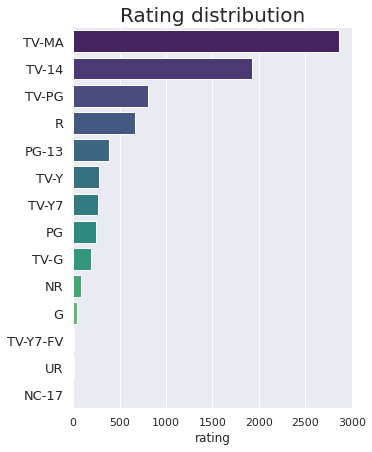

In [88]:
plt.figure(figsize=(5,7))
ax = sns.barplot(y=rating.index, x=rating,palette='viridis',orient='h')
plt.yticks(fontsize=13)
sns.despine(top=True,left=True)
plt.title('Rating distribution',fontsize=20)

#### Inference: Most content is for mature audience only

### Content description length

Text(0.5, 1.0, 'Content Description boxplot')

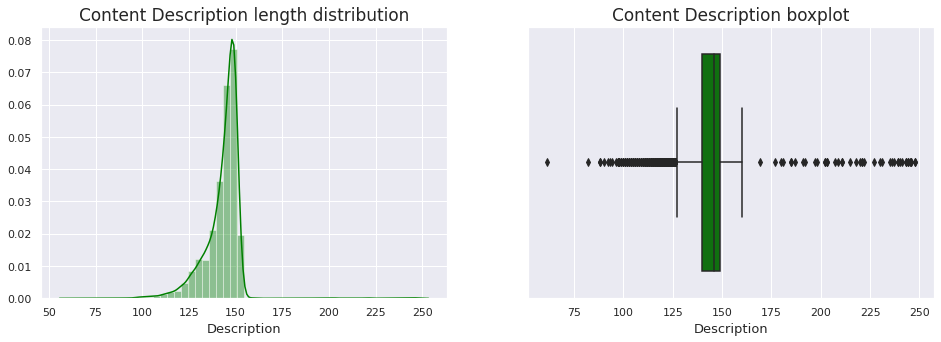

In [89]:
# Get the length of the description feature
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)  # It says plotting 2 graphs in 1 row
sns.distplot(df['description'].apply(lambda x: len(x)), color='green') # Get distplot for description length
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description length distribution',fontsize=17)

plt.subplot(1,2,2)
sns.boxplot(df['description'].apply(lambda x: len(x)), color='green') # Get boxplot for description length
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description boxplot',fontsize=17)

#### Inference : Most content has description length of ~140 words. There are outliers on both sides of left and right whiskers of the boxplot. 

####How these outliers may adversely affect the clustering analysis?
If a row has a lower length of characters, most of them may get removed during data cleaning process and this point will be at higher distance from the most clusters. Hence, In clustering analysis as well it will be a outlier. And depending upon distance, it will be a part of closest cluster, giving a bad spread to the cluster. 
Similar for the high length of characters but here the number of characters remained after data cleaning will be awkwardly more than the normal, and so their distances from the other points. It will also give bad spread to the cluster.


## Most frequent words in content description

Textual Data cleaning process involves,

### Stop words removal : 
The objective is to focus on important words, and removing such commonly occuring words will increase the speed as well. Stop word removal is one of the most commonly used preprocessing steps across different NLP applications. The idea is simply removing the words that occur commonly across all the documents in the corpus. Typically, articles and pronouns are generally classified as stop words.

### Punctuations removal : 
Punctuations do add meaning to sentences but not to words. There are applications where they might be necessary but not in this case.

### Stemming : 
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for “boat” might also return “boats” and “boating”. Here, “boat” would be the stem for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required.

### Lemmatization : 
In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as the same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming

Lemmatization looks at surrounding text to determine a given word’s part of speech, it does not categorize phrases.






### This study will only follow, 
* Stop word (English) and punctuation removal

to clean the description data.

Since, words of different forms have different meanings when used in different context.

### Stop words and punctuation removal

In [90]:
# Function to remove punctuations and stop words from the message
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]  # to remove punctuations
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')]) # to remove stopwords

In [91]:
import string
string.punctuation # check the list of punctuations 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
# Get tokenized description by applying text_process function on description feature
df['tokenized_description'] = df['description'].apply(text_process)

In [93]:
# check out some entry from description (This is before tokentization)
df['description'][25]

'This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

In [94]:
# check out same entry from tokenized_description (This is after tokentization)
df['tokenized_description'][25]

'reallife look FBI counterterrorism operations features access sides sting government informant radicalized target'

In [95]:
""" We will be using tf-idf vectorizer which converts txt to vectors, tf : term frequency , idf : inverse document frequency 
(It is arguably better than count vectorizer in many cases,
owing to additional feature of computing documents  frequency in the total documents )"""

# set parameters for tfidfvectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95,
                              max_features = 3000, lowercase=True,
                              stop_words = 'english')

In [96]:
# Define helper functions to get top words
def get_top_n_words(n_top_words, vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

Text(0.5, 1.0, 'Most frequent words in content description')

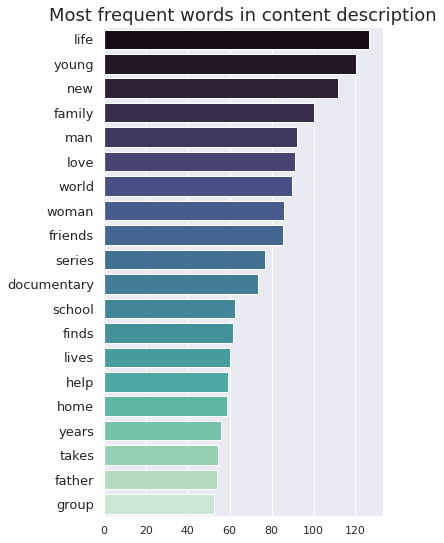

In [97]:
# Get top 20 words and their count from the tokenized_description
plt.figure(figsize=(5,9))
words, word_values = get_top_n_words(n_top_words=20,
                                     vectorizer=vectorizer, 
                                     text_data=df['tokenized_description'])
# Plot top 20 words
sns.barplot(y=words, x=word_values,palette='mako')
plt.yticks(fontsize=13)
plt.title('Most frequent words in content description',fontsize=18)

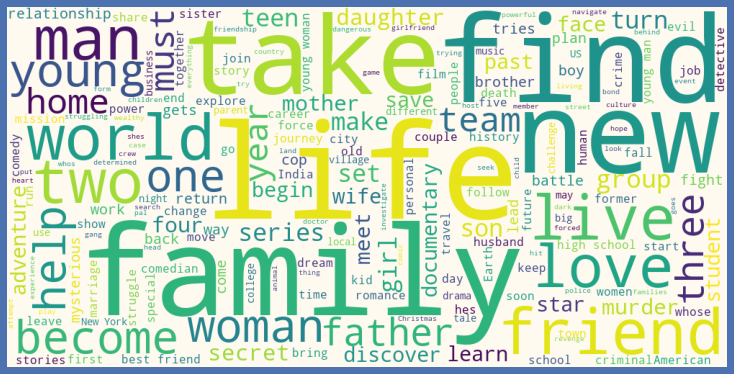

In [98]:
# Plot wordcloud for tokenized description
text = df['tokenized_description']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(text))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Inference :  Life, young, new, family and man are the most occuring words from the complete vocabulary of description.

# Feature Selection & Train datasets

We will try to form clusters based on one or more features. That's what I feel, is ideal for data that can be associated in meaningful subsets. Like title and genres, or title and description make meaningful subsets.

So we will be creating such datasets in this section.

The text based features are : 

type, director, cast, country, release_year, rating, listed_in, description

In [56]:
# Import the tfidfvectorizer
"""
max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents".

min_df is used for removing terms that appear too infrequently. For example:
    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".
"""
# Intialize the vectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95, max_features = 3000, lowercase=True,
                              stop_words = 'english')

In [57]:
def get_vectorized_df(data):
  """Returns a vectorized dataframe on inputting series or dataframe, if other type is inputted, while provide the error
  vectorizes each column and converts the data to dataframe
  combines all the dataframes"""
  count = 0
  # Iterate through the dataframe columns
  get_type = type(pd.Series([1,2,3]))

  # If data entered is of series type
  if type(data) == get_type:
    # Process the text-based features, remove punctuations and stop words
    data = data.apply(text_process)
    # Apply the vectorizer
    temp = vectorizer.fit_transform(data) # X is in sparse matrix format, to visulaize it we need to convert it into array

    # Store the sparse_matrix data in the dataframe
    temp_v = pd.DataFrame(temp.toarray() , columns=vectorizer.get_feature_names()) # This dataframe will be used for the clustering analysis.

    return temp_v
  
  else:
    for col in data.columns:
      # Process the text-based features
      feature = data[col].apply(text_process)

      # Apply the vectorizer
      temp = vectorizer.fit_transform(feature) # X is in sparse matrix format, to visulaize it we need to convert it into array

      # Store the sparse_matrix data in the dataframe
      temp_v = pd.DataFrame(temp.toarray() , columns=vectorizer.get_feature_names()) # This dataframe will be used for the clustering analysis.

      if count==0:
        prev = temp_v.copy() # Make a copy of 1st processed dataframe

      elif count==1:
        next = pd.concat((prev,temp_v), axis=1) # update the prev dataframe with the columns of temp_v dataframe

      else:
        next = pd.concat((next,temp_v), axis=1) # update the next dataframe with the columns of temp_v dataframe

      count+=1  # Update the count

    if count==0:
      return prev
    else:
      return next # Returns the fully updated dataframe

## Create d dataset (description)

In [101]:
# Save the data in the variable
D = df['tokenized_description'].copy()

# Get vectorized df
d = get_vectorized_df(D) 
# View the vectorized df
d.head()

10  100000  10yearold  11yearold   12  12yearold   13   15  17yearold  \
0  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
1  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
2  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
3  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   
4  0.0     0.0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   

   1920s  ...  years  yoga  york  young  younger  youth  youtube  zany  \
0    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
1    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
2    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
3    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   
4    0.0  ...    0.0   0.0   0.0    0.0      0.0    0.0      0.0   0.0   

   zombie  zone  
0     0.0   0.0  
1     0.0   0.0  
2     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0  

[5 rows x 3000 columns]

## Create genres dataset (genres)

In [102]:
# Save the data in the variable
GENRES = df['listed_in'].copy()

# Get vectorized df
genres = get_vectorized_df(GENRES) 
# View the vectorized df
genres.head()

actionadventure  animefeatures  animeseries  britishtvshows  \
0          0.00000            0.0          0.0             0.0   
1          0.00000            0.0          0.0             0.0   
2          0.00000            0.0          0.0             0.0   
3          0.50815            0.0          0.0             0.0   
4          0.00000            0.0          0.0             0.0   

   childrenfamilymovies  classicculttv  classicmovies  comedies  crimetvshows  \
0                   0.0            0.0            0.0       0.0           0.0   
1                   0.0            0.0            0.0       0.0           0.0   
2                   0.0            0.0            0.0       0.0           0.0   
3                   0.0            0.0            0.0       0.0           0.0   
4                   0.0            0.0            0.0       0.0           0.0   

   cultmovies  ...  teentvshows  thrillers  tvactionadventure  tvcomedies  \
0         0.0  ...          0.0        0.0                0.0         0.0   
1         0.0  ...          0.0        0.0                0.0         0.0   
2         0.0  ...          0.0        0.0                0.0         0.0   
3         0.0  ...          0.0        0.0                0.0         0.0   
4         0.0  ...          0.0        0.0                0.0         0.0   

   tvdramas  tvhorror  tvmysteries  tvscififantasy  tvshows  tvthrillers  
0  0.474096       0.0          0.0         0.78437      0.0          0.0  
1  0.000000       0.0          0.0         0.00000      0.0          0.0  
2  0.000000       0.0          0.0         0.00000      0.0          0.0  
3  0.000000       0.0          0.0         0.00000      0.0          0.0  
4  0.000000       0.0          0.0         0.00000      0.0          0.0  

[5 rows x 42 columns]

##Create crgt dataset, (country, rating, genre, type)

In [99]:
# Save the data in the variable
CRGT = df[df['lead_country']!='no_country'][['lead_country','rating','listed_in','type']].copy()

# Get vectorized df
crgt = get_vectorized_df(CRGT)

# Print the shape of the dataframe
print(crgt.shape)
print(" ")
# View the vectorized df
crgt.head()

(7265, 108)
 


argentina  australia  austria  belgium  brazil  bulgaria  canada  chile  \
0        0.0        0.0      0.0      0.0     1.0       0.0     0.0    0.0   
1        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   
2        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   
3        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   
4        0.0        0.0      0.0      0.0     0.0       0.0     0.0    0.0   

   china  colombia  ...  tvactionadventure  tvcomedies  tvdramas  tvhorror  \
0    0.0       0.0  ...                0.0         0.0  0.479465       0.0   
1    0.0       0.0  ...                0.0         0.0  0.000000       0.0   
2    0.0       0.0  ...                0.0         0.0  0.000000       0.0   
3    0.0       0.0  ...                0.0         0.0  0.000000       0.0   
4    0.0       0.0  ...                0.0         0.0  0.000000       0.0   

   tvmysteries  tvscififantasy  tvshows  tvthrillers  movie  tvshow  
0          0.0        0.776888      0.0          0.0    0.0     1.0  
1          0.0        0.000000      0.0          0.0    1.0     0.0  
2          0.0        0.000000      0.0          0.0    1.0     0.0  
3          0.0        0.000000      0.0          0.0    1.0     0.0  
4          0.0        0.000000      0.0          0.0    1.0     0.0  

[5 rows x 108 columns]

## Datasets' size comparison

Text(0.5, 1.0, 'Size comparison of datasets')

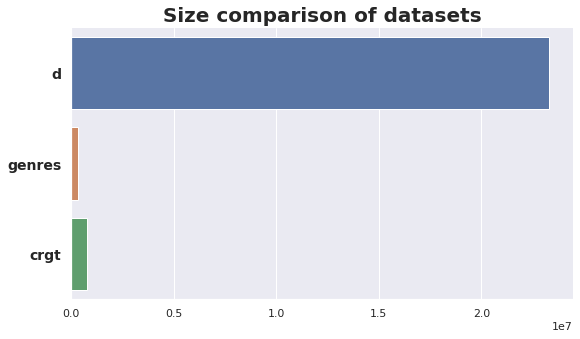

In [109]:
plt.figure(figsize=(9,5))
sns.barplot(y=['d','genres','crgt'],x=[d.size,genres.size, crgt.size],orient='h')
sns.despine(right =True)
plt.yticks(fontsize=14,fontweight = 'bold')
plt.title('Size comparison of datasets',fontweight = 'bold' ,fontsize=20)

# Clustering Models Building

## Must run functions

In [110]:
def plot_tsne_pca(data, labels):
  """Retuns 
  scatter plot of data reduced to 2 dimensions using pca
  scatter plot of data reduced to 40 dimensions using tsne"""
  max_label = max(labels)

  pca = PCA(n_components=2).fit_transform(data)  # reducing the data to 2 principal components using pca
  tsne = TSNE().fit_transform(PCA(n_components=40).fit_transform(data)) # reducing the data to 50 principal components using pca and transform using tsne
  
  idx = np.random.choice(range(pca.shape[0]), size=5000, replace=False)
  label_subset = [cm.hsv(i/max_label) for i in labels[idx]]

  sns.set_style("whitegrid") # Setting white background for the clusters
  
  plt.figure(figsize=(18, 8))
  plt.subplot(1,2,1)
  sns.scatterplot(pca[idx, 0], pca[idx, 1], c=label_subset, s=90) # Plot pca0 vs pca1
  plt.title('PCA Cluster Plot')
  plt.grid(False)

  plt.subplot(1,2,2)
  sns.scatterplot(tsne[idx, 0], tsne[idx, 1], c=label_subset, s=90) # Plot tsne0 vs tsne1
  plt.title('TSNE Cluster Plot')
  plt.grid(False)
  plt.show()

In [111]:
def get_cluster_labels_list(data, clusters, labels, n_terms):
  #label_data = vectorizer.fit_transform(label_data)
  #labels = vectorizer.get_feature_names()
  df = pd.DataFrame(data).groupby(clusters).mean()
  label_list = []
  for i,r in df.iterrows():
      label_list.append(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
  return label_list 

In [118]:
def get_cluster_info(vectorized_df, cluster_labels):
  
  # Merge the dataset first
  if cluster_labels.shape[0] == df.shape[0]:
    temp = df.copy()
  else:
    temp = df[df['country']!='no_country']

  # Add cluster column
  temp['cluster'] = cluster_labels  
  n_clusters = temp['cluster'].nunique() # Get total number of clusters

  # Get top_keywords
  n_features = vectorized_df.shape[1]
  n_terms = int(n_features/n_clusters)
  if n_terms > 50:
    n_terms = 20
  elif n_features <50:
    n_terms = 2
  elif n_terms <3:
    n_terms = 5
  top_keywords = get_cluster_labels_list(vectorized_df, cluster_labels, vectorized_df.columns, n_terms)

  # Get cluster_size
  cluster_size = []
  for i in range(n_clusters):
    content_count = temp[temp['cluster']==i]['title'].count()
    cluster_size.append(content_count)

  # Get similar content list
  content_list = [temp[temp['cluster']==i]['title'].tolist() for i in range(temp['cluster'].nunique())]

  # Create cluster_df
  cluster_df = pd.DataFrame(list(zip(top_keywords, cluster_size,content_list)), columns =['Top_keywords','Cluster_size','Similar_content'])

  print("The cluster size variation looks like... ")
  print(" ")
  # Plot the clustersize
  plt.figure(figsize=(5,3))
  sns.set() # Get a default theme, i.e. with gray background
  sns.lineplot(y=cluster_df['Cluster_size'],x=range(cluster_df.shape[0]),markers=['+'],linewidth=2,label='Cluster sizes')

  plt.axhline(y=cluster_df['Cluster_size'].mean(),label=f'Avg: {int(cluster_df["Cluster_size"].mean())}',c='red')
  plt.grid(False)
  plt.ylabel(" ")
  plt.xlabel('Cluster centres',fontsize=13)
  plt.legend()
  plt.show() # To show it here, before the cluster_df

  print(" ") # Adding a gap between the results
  print(f"The keywords in the largest cluster are, \n{cluster_df[cluster_df['Cluster_size']==cluster_df['Cluster_size'].max()]['Top_keywords'].tolist()[0]}")
  print(" ")
  print("The resultant dataframe of cluster info is... ")
  print(" ")

  # Return the sorted cluster_df
  return cluster_df.sort_values('Cluster_size',ascending=False)

## Mini Batch K-Means Clustering 

### Optimal number of clusters

With K-Means clustering, only tough part is selecting number of clusters, since the algorithm will just make as many as you told. 

There are methods like silhouette score and elbow method to find out optimal number of clusters.

#### Silhouette score method



Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

In [ ]:
def find_optimal_clusters(dataset_list, labels_list,color_list):
  """Function takes list of datasets,
  applies minibatchkmeans clustering to them
  and returns the rough estimate of optimal number of clusters for each dataset"""

  # Iterating through the dataset_list
  for i in range(len(dataset_list)):
    data = dataset_list[i]
    label = labels_list[i]
    paint = color_list[i]

    print("***"*5,f"Working on {label}","***"*5)
    print(" ")
    # Choosing the max number of clusters based on the dimension of the data
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    if len(data.columns)>500:
      params = (np.linspace(2,500,10)).astype(int)
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    else:
      params = (np.linspace(2,len(data.columns),10)).astype(int)

    iters = params
    sse = []
    ss = []

    # Iterating through the parameters
    for k in iters:
      # Create model and get necessary attributes
      model = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
      model_labels = model.labels_
      model_inertia = model.inertia_

      # Get performance scores
      sse.append(model_inertia)
      ss.append(silhouette_score(data, model_labels))

    plt.figure(figsize=(16,6))
    #Plot elbow plot
    plt.subplot(1,2,1) 
    plt.plot(iters, sse, marker='o',color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('SSE',fontsize=13)
    plt.title(f'Elbow Plot for {label}',fontsize=18,color=paint)

    # Plot silhouette score plot
    plt.subplot(1,2,2) 
    sns.barplot(iters,ss,color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('Silhouette score',fontsize=13)
    plt.title(f'Silhouette score plot for {label}',fontsize=18,color=paint)

    plt.show()
    # Print optimal number of clusters
    print(" ")
    best_cluster_centers = params[ss.index(max(ss))]
    print("---"*10)
    print(f"For dataset {label}, optimal number of clusters are {best_cluster_centers}")
    print("---"*10)
    print(" ")

*************** Working on description ***************
 


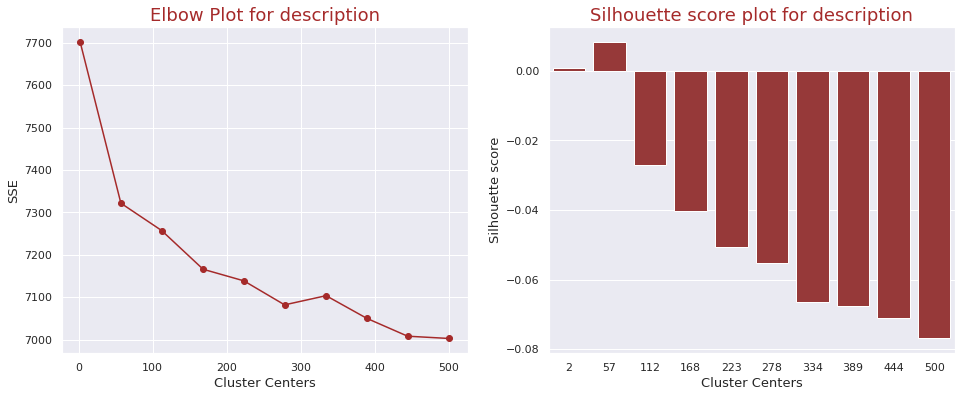

 
------------------------------
For dataset description, optimal number of clusters are 57
------------------------------
 
*************** Working on genres ***************
 


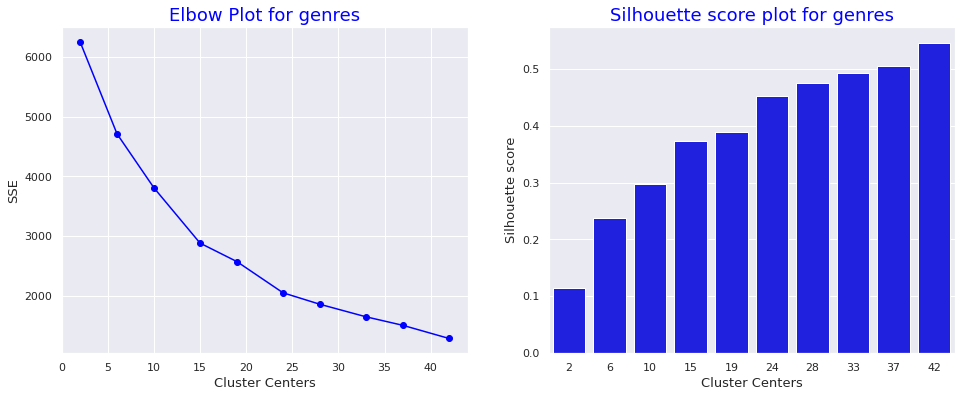

 
------------------------------
For dataset genres, optimal number of clusters are 42
------------------------------
 
*************** Working on country_rating_genres_type ***************
 


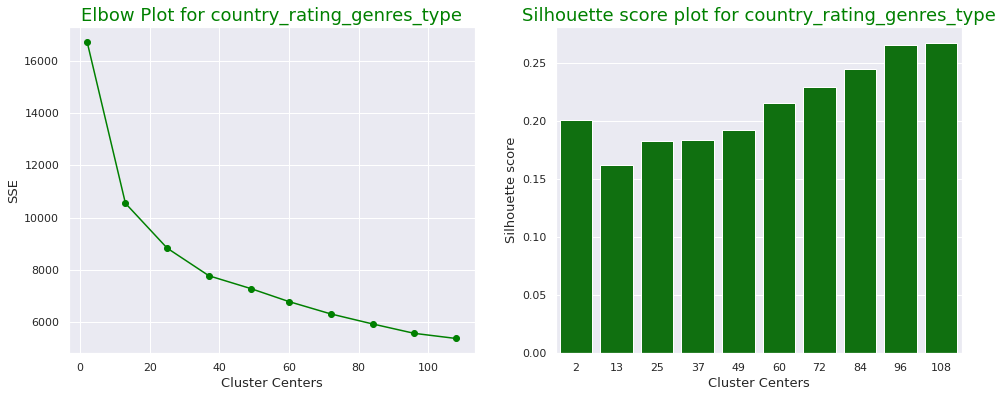

 
------------------------------
For dataset country_rating_genres_type, optimal number of clusters are 108
------------------------------
 


In [ ]:
# Create dataset_list, labels_list and the color_list
dataset_list = [d,genres,crgt]
labels_list = ['description','genres','country_rating_genres_type']
color_list = ['brown','blue','green']

# Find the optimal number of clusters using find_optimal_clusters
find_optimal_clusters(dataset_list, labels_list,color_list)

In [ ]:
# *******Investigating description dataset a little more*******

def investigate_deep_for_cluster(data,params):
  # candidate values for our number of cluster
  parameters = params
  
  ss = []
  # evaluation based on silhouette_score
  for k in parameters:
      # Create model and get necessary attributes
      model = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
      model_labels = model.labels_

      # Get performance scores
      ss.append(silhouette_score(data, model_labels))

  # Plot silhouette score plot
  plt.figure(figsize=(9,6))
  sns.barplot(parameters,ss,color='brown')
  plt.xlabel('Cluster Centers',fontsize=13)
  plt.ylabel('Silhouette score',fontsize=13)
  plt.title(f'Silhouette score plot for description',fontsize=18,color='brown')
  plt.show()
  # Print optimal number of clusters
  print(" ")
  best_cluster_centers = parameters[ss.index(max(ss))]
  print("---"*10)
  print(f"For dataset description, optimal number of clusters are {best_cluster_centers}")
  print("---"*10)
  print(" ")

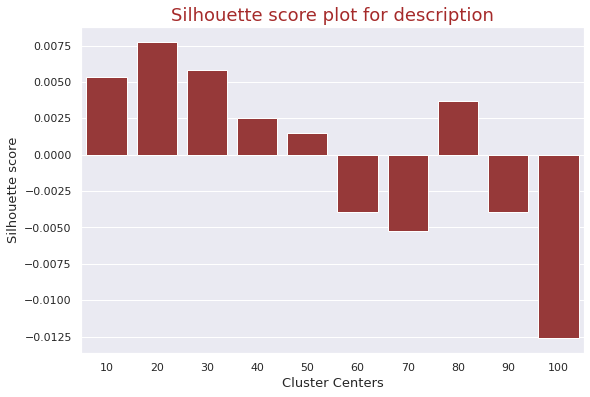

 
------------------------------
For dataset description, optimal number of clusters are 20
------------------------------
 


In [ ]:
data = d.copy()
params = (np.linspace(10,100,10)).astype(int) # searching between 10 to 100

# Investigate deep
investigate_deep_for_cluster(data,params)

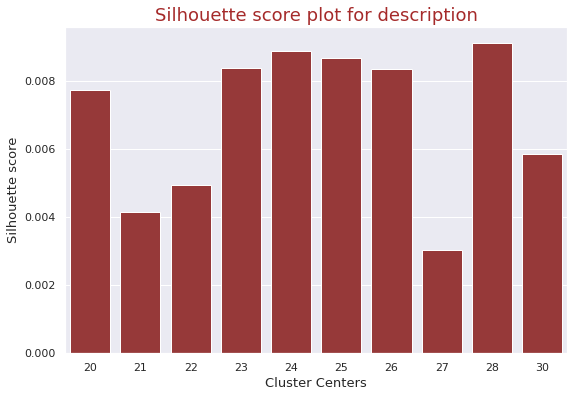

 
------------------------------
For dataset description, optimal number of clusters are 28
------------------------------
 


In [ ]:
data = d.copy()
params = (np.linspace(20,30,10)).astype(int) # searching between 20 to 30

# Investigate deep
investigate_deep_for_cluster(data,params)

<u>Inference </u>: Optimal number of clusters for the datasets d, genres, and crgt are 28, 42, and 108 respectively.

### Training the k-means clustering model 

In [113]:
# Train the MiniBatchKMeans clustering model for description dataset
clusters_d = MiniBatchKMeans(n_clusters=28, init_size=1024, batch_size=2048, random_state=20).fit_predict(d)
# Train the MiniBatchKMeans clustering model for genres dataset
clusters_genres= MiniBatchKMeans(n_clusters=42, init_size=1024, batch_size=2048, random_state=20).fit_predict(genres)
# Train the MiniBatchKMeans clustering model for crgt dataset
clusters_crgt = MiniBatchKMeans(n_clusters=108, init_size=1024, batch_size=2048, random_state=20).fit_predict(crgt)

#### Performance check [Model: MiniBatchKMeans clustering]

#####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [114]:
# Davies bouldin score, closer to 0 means better partition
print(f'davies_bouldin_score for description data : {davies_bouldin_score(d, clusters_d)}')

print(f'davies_bouldin_score for genres data : {davies_bouldin_score(genres, clusters_genres)}')

print(f'davies_bouldin_score for crgt data : {davies_bouldin_score(crgt, clusters_crgt)}')

davies_bouldin_score for description data : 8.06551139309477
davies_bouldin_score for genres data : 1.1262425701503749
davies_bouldin_score for crgt data : 1.7375130040907825


In [115]:
# Silhouette score, closer to 1 means better partition
print(f'Silhouette_score for description data : {silhouette_score(d, clusters_d)}')

print(f'Silhouette_score for genres data : {silhouette_score(genres, clusters_genres)}')

print(f'Silhouette_score for crgt data : {silhouette_score(crgt, clusters_crgt)}')

Silhouette_score for description data : 0.009125250090087638
Silhouette_score for genres data : 0.5457281919294956
Silhouette_score for crgt data : 0.26778805385782056


###Have a look at the results!

####<u><b>Plot the clusters</u></b>

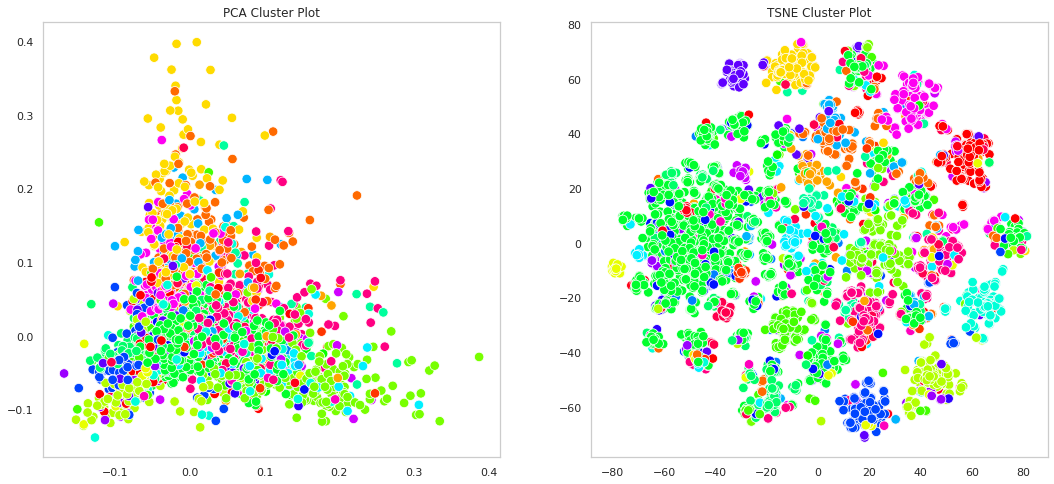

In [ ]:
# Visualize the clusters in dataset description 
plot_tsne_pca(d, clusters_d)

We have 28 clusters for the description dataset. Observing the plot we can say that MiniBatchKMeans has done a pretty descent job at forming clusters.

The clusters can be viewed separately. There seems a possibility of one or more large clusters. But, most clusters are in comparatively similar sizes. The clusters are spherical in shape, this is what KMeans do, make spheroidal clusters.



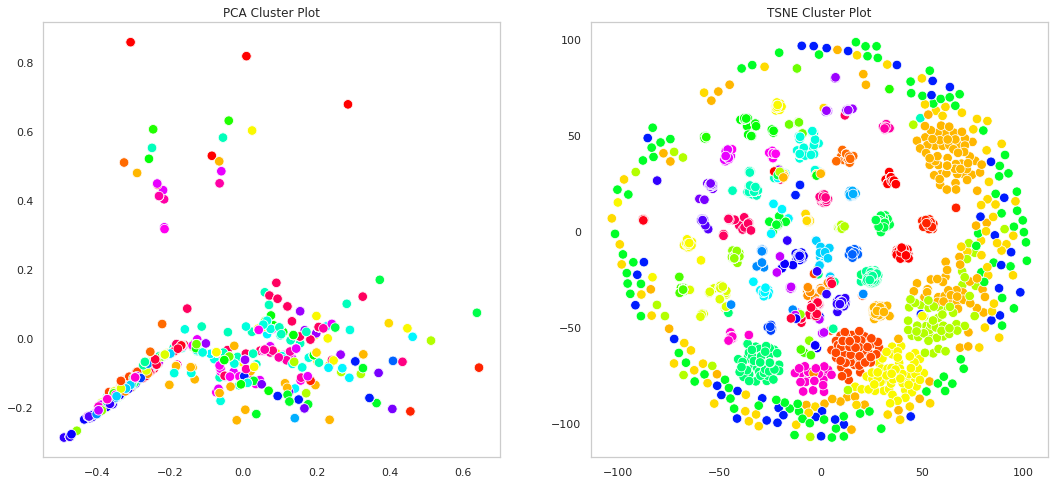

In [ ]:
# Visualize the clusters in dataset genres
plot_tsne_pca(genres, clusters_genres)

We have 42 clusters for genres dataset and KMeans has done a decent job but the clusters could have been better-separated. Perhaps a spectral or agglomerative or DBSCAN clustering method will give better results.

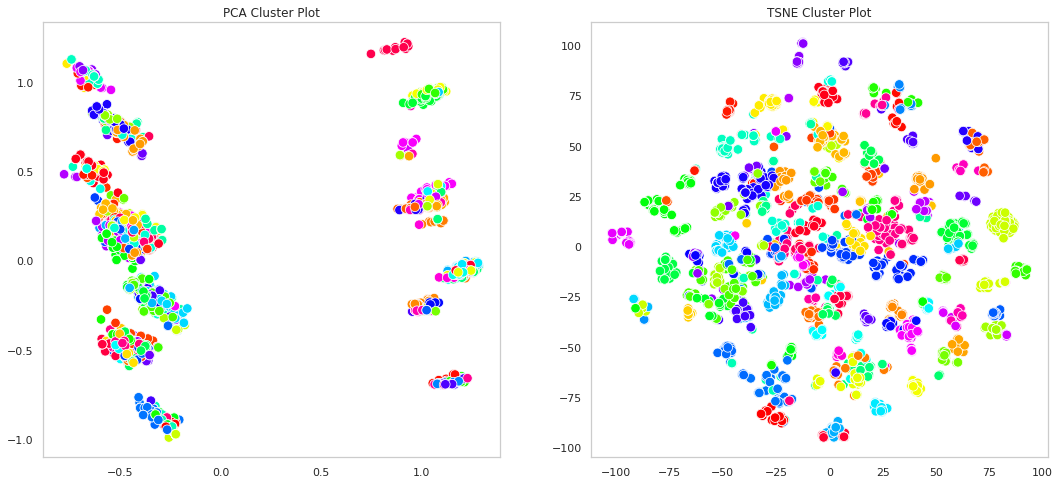

In [ ]:
# Visualize the clusters in dataset country_rating_genres_type
plot_tsne_pca(crgt, clusters_crgt)

We have 108 clusters for country_rating_genres_type dataset, and by observing the plots, the KMeans has done a good job at separating the similar data.
Overall the separation looks pretty good. 

 I would say that K-Means did a pretty decent job at clustering. Let's see them clusters and find similiar content.

#### <b><u>Check out the results</b></u>

The cluster size variation looks like... 
 


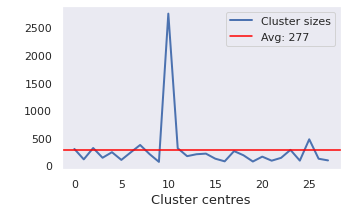

 
The keywords in the largest cluster are, 
friend,hes,wife,save,police,detective,tries,crime,years,death,time,father,group,finds,woman,home,help,murder,young,life
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
10  friend,hes,wife,save,police,detective,tries,cr...          2751   
25  home,finds,marriage,years,triangle,heart,roman...           470   
7   police,returns,accident,help,brother,village,y...           367   
2   years,turn,secret,man,gets,friend,time,tries,p...           312   
11  star,forces,set,packed,civil,life,stories,stag...           308   
0   human,explore,people,dangerous,tour,new,travel...           295   
23  adventure,life,home,school,new,true,college,ch...           278   
17  examines,brings,home,horror,popular,diverse,ad...           256   
4   friends,senior,secret,gets,teens,monster,colle...           236   
6   group,personal,filmmaker,culture,captures,amer...           233   
14  falls,begins,family,embark,child,selfdiscovery...           210   
8   murder,documentary,years,mission,job,dark,woma...           202   
13  life,mom,reality,share,love,upside,different,s...           199   
18  sisters,save,marriage,competition,life,woman,r...           180   
12  feelings,heart,fall,family,takes,new,father,wi...           164   
20  special,police,national,inspired,hockey,footba...           155   
3   daughter,forces,secrets,sheriff,man,life,finds...           135   
22  new,detective,city,mission,discover,group,past...           133   
15  standup,woman,writer,business,star,finds,young...           118   
26  family,aspiring,trying,daughter,things,money,l...           117   
1   death,finds,life,seeks,daughter,family,unexpec...           106   
5   nations,ii,successful,century,rock,family,huma...            96   
27  fail,young,lives,tries,spaceship,missions,maki...            87   
24  fbi,prison,young,detective,brothers,forensic,p...            83   
21  series,music,global,behindthescenes,war,reenac...            82   
16  young,spain,based,stardom,special,comedy,recon...            70   
19  power,political,stardom,cartoonist,traces,cont...            67   
9   defending,save,justice,apartment,champion,chin...            60   

                                      Similar_content  
10  [7:19, 23:59, 21, 46, 706, 1920, 1922, 1983, O...  
25  [15-Aug, 100 Days My Prince, 14 Cameras, 365 D...  
7   [10 Days in Sun City, 100 Meters, 13 Sins, 20 ...  
2   [​Mayurakshi, A Christmas Catch, A Fall from G...  
11  [25 Kille, 3 Days to Kill, 93 Days, A Little H...  
0   [9, Òlòtūré, 2015 Dream Concert, 21 Again, A B...  
23  [Feb-09, #FriendButMarried 2, #Selfie 69, 3 Id...  
17  [#blackAF, 13 Reasons Why, 72 Cutest Animals, ...  
4   [187, #FriendButMarried, #realityhigh, 1 Chanc...  
6   [2,215, #AnneFrank - Parallel Stories, #Rucker...  
14  [¡Ay, mi madre!, 10,000 B.C., 18 Presents, 37 ...  
8   [(Un)Well, 20 Feet From Stardom, A Leaf of Fai...  
13  [​Goli Soda 2, 20th Century Women, 3 Türken & ...  
18  [3%, 2 Alone in Paris, A Ghost Story, A Glimps...  
12  [#Roxy, 7 Din Mohabbat In, A Perfect Ending, A...  
20  [100% Hotter, 21 Thunder, 6 Underground, A 2nd...  
3   [​Maj Rati ​​Keteki, Çarsi Pazar, A Go! Go! Co...  
22  [3022, 28 Moons, 40 Sticks, A Land Imagined, A...  
15  [5 to 7, A Mighty Team, A Most Violent Year, A...  
26  [#Selfie, 16 Blocks, A Queen Is Born, A Silent...  
1   [122, 12 Years Promise, 5 Flights Up, 6 Years,...  
5   [A Family Affair, Age of Tanks, Ancient Aliens...  
27  [Agyaat, Almost Love, Arctic Dogs, As Above, S...  
24  [A House of Blocks, A Taiwanese Tale of Two Ci...  
21  [1994, '89, 3 Deewarein, American Circumcision...  
16  [10 jours en or, 4L, Ali Wong: Baby Cobra, Ame...  
19  [​SAINT SEIYA: Knights of the Zodiac, #cats_th...  
9   [#Alive, 1BR, A Go! Go! Cory Carson Christmas,...

In [119]:
# Get clusters info for description dataset
get_cluster_info(d, clusters_d)

The cluster size variation looks like... 
 


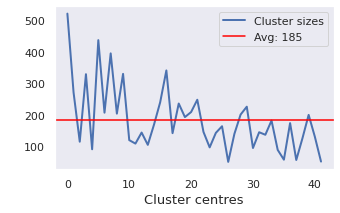

 
The keywords in the largest cluster are, 
internationalmovies,documentaries
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
0             internationalmovies,documentaries           521   
5                 comedies,childrenfamilymovies           437   
7           internationalmovies,actionadventure           395   
16                   internationalmovies,dramas           341   
9                      dramas,independentmovies           330   
3                   musicmusicals,standupcomedy           329   
1                               dramas,comedies           271   
21                        dramas,romanticmovies           248   
15                      comedies,romanticmovies           240   
18                        britishtvshows,kidstv           236   
29                internationaltvshows,tvdramas           226   
20                 actionadventure,scififantasy           209   
6                              dramas,thrillers           207   
8                internationaltvshows,realitytv           204   
28                        tvdramas,crimetvshows           201   
39            internationalmovies,musicmusicals           200   
19                   documentaries,sportsmovies           193   
33              internationaltvshows,tvcomedies           182   
36                      crimetvshows,docuseries           174   
14             internationalmovies,horrormovies           169   
25                 internationalmovies,comedies           164   
22             internationaltvshows,animeseries           146   
31                   comedies,independentmovies           145   
12                   sciencenaturetv,docuseries           144   
24           internationaltvshows,koreantvshows           143   
17  internationaltvshows,spanishlanguagetvshows           142   
27                     comedies,actionadventure           140   
32                internationalmovies,thrillers           137   
40             tvscififantasy,tvactionadventure           131   
38                         classicmovies,dramas           126   
10                     tvdramas,romantictvshows           120   
2                             tvcomedies,kidstv           115   
11                       thrillers,horrormovies           109   
13                  documentaries,musicmusicals           105   
23                         tvthrillers,comedies            97   
30                   tvcomedies,romantictvshows            95   
4                          tvdramas,tvmysteries            91   
34                    documentaries,lgbtqmovies            89   
35                          comedies,cultmovies            58   
37                     dramas,faithspirituality            57   
41                         documentaries,movies            52   
26            tvcomedies,standupcomedytalkshows            51   

                                      Similar_content  
0   [(T)ERROR, #AnneFrank - Parallel Stories, #cat...  
5   [48 Christmas Wishes, A Babysitter's Guide to ...  
7   [​Goli Soda 2, 10,000 B.C., 14 Blades, 16 Bloc...  
16  [7:19, ​Maj Rati ​​Keteki, ​Mayurakshi, Òlòtūr...  
9   [​​Kuch Bheege Alfaaz, 18 Presents, 20th Centu...  
3   [A Russell Peters Christmas, Adam Devine: Best...  
1   [#Selfie, #Selfie 69, 10 jours en or, 2 States...  
21  [#FriendButMarried, #FriendButMarried 2, 1 Cha...  
15  [#Roxy, 10 Days in Sun City, 5 to 7, 50 First ...  
18  [44 Cats, Abby Hatcher, Alphablocks, Ask the S...  
29  [Feb-09, 21 Sarfarosh: Saragarhi 1897, A Boy N...  
20  [9, 3022, Æon Flux, 2036 Origin Unknown, 2307:...  
6   [1922, Oct-01, 22-Jul, 26 Years, 3 Deewarein, ...  
8   [(Un)Well, 100% Hotter, 21 Again, 60 Days In, ...  
28  [1983, Şubat, 20 Minutes, 21 Thunder, Ad Vitam...  
39  [2015 Dream Concert, 7 Din Mohabbat In, 90 ML,...  
19  [2,215, '89, #Rucker50, 1 Mile to You, 100 Met...  
33  [#blackAF, A Very Secret Service, Adam Ruins E...  
36  [1994, 13 Reasons Why: Beyond the Reasons, 7 D...  
14  [23:59, 122, 706, Ég man þig, 1st Summoning, A...  
25  [¡Ay, mi madre!, Çarsi Pazar, Çok Filim Hareke...  
22  [​S

In [120]:
# Get clusters info for genres dataset
get_cluster_info(genres, clusters_genres)

The cluster size variation looks like... 
 


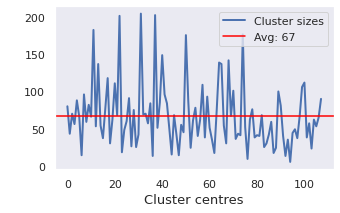

 
The keywords in the largest cluster are, 
independentmovies,dramas,internationalmovies,tvma,movie
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
31  independentmovies,dramas,internationalmovies,t...           205   
37        dramas,internationalmovies,tvma,india,movie           203   
22       brazil,unitedstates,standupcomedy,tvma,movie           202   
11  internationalmovies,unitedstates,documentaries...           183   
74      egypt,comedies,internationalmovies,tv14,movie           177   
..                                                ...           ...   
47  scififantasy,actionadventure,tv14,unitedstates...            14   
92        dramas,internationalmovies,tvma,movie,chile            13   
36  britishtvshows,realitytv,unitedkingdom,tvpg,tv...            13   
76    internationaltvshows,tvdramas,italy,tvma,tvshow             9   
94      dramas,internationalmovies,tvma,movie,uruguay             5   

                                      Similar_content  
31  [100 Meters, 18 Presents, 26 Years, 365 Days, ...  
37  [1920, 6-5=2, 7 Khoon Maaf, A Scandall, A Wedn...  
22  [Adam Devine: Best Time of Our Lives, ADAM SAN...  
11  [#AnneFrank - Parallel Stories, #cats_the_mewv...  
74  [Çarsi Pazar, 10 jours en or, 100% Halal, 30 D...  
..                                                ...  
47  [Expo, Halo: The Fall of Reach, IO, Larceny, P...  
92  [Dry Martina, Fabrizio Copano: Solo pienso en ...  
36  [Amazing Interiors, Battlefield Recovery, Cabi...  
76  [Baby, Curon, Gomorrah, Luna Nera, Medici: Mas...  
94  [A Twelve Year Night, Alelí, Alexis Viera: A S...  

[108 rows x 3 columns]

In [121]:
# Get clusters info for description dataset
get_cluster_info(crgt, clusters_crgt)

<u>Inference</u>: We got an abnormal large sized cluster among other smaller clusters in case of description data. In case of genres and crgt dataset, the cluster size variation is decenty consistent.

## Hierarchical Clustering (method = ward)

### Optimal number of clusters

In [ ]:
# generate the linkage matrix
ward_cluster = linkage(d, 'ward')

* Thing you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. 

* This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:

In [ ]:
c, coph_dists = cophenet(ward_cluster, pdist(d))
c

0.04194936814509658

No matter what method and metric you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [ ]:
ward_cluster[0]

array([1373., 1374.,    0.,    2.])

We can see that each row of the resulting array has the format,
<b>[idx1, idx2, dist, sample_count].</b>

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 4.593e+03 and 4.594e+03, as they had a distance of 0. This created a cluster with a total of 2 samples.


In [ ]:
ward_cluster[1]

array([1482., 1483.,    0.,    2.])

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 4.595e+03 and 7.787e+03, which had a distance of 0. This again formed another cluster with a total of 3 samples.

The indices of the clusters until now correspond to our samples. Remember that we had a total of 7788 samples, so indices 0 to 7787. Let's have a look at the first 20 iterations:


In [ ]:
ward_cluster[:20]

array([[1.373e+03, 1.374e+03, 0.000e+00, 2.000e+00],
       [1.482e+03, 1.483e+03, 0.000e+00, 2.000e+00],
       [6.022e+03, 6.023e+03, 0.000e+00, 2.000e+00],
       [6.024e+03, 7.772e+03, 0.000e+00, 3.000e+00],
       [1.283e+03, 1.284e+03, 0.000e+00, 2.000e+00],
       [4.578e+03, 4.579e+03, 0.000e+00, 2.000e+00],
       [4.580e+03, 7.775e+03, 0.000e+00, 3.000e+00],
       [4.980e+02, 4.426e+03, 0.000e+00, 2.000e+00],
       [5.380e+03, 5.381e+03, 0.000e+00, 2.000e+00],
       [4.590e+03, 6.704e+03, 0.000e+00, 2.000e+00],
       [5.682e+03, 5.683e+03, 0.000e+00, 2.000e+00],
       [2.337e+03, 2.338e+03, 0.000e+00, 2.000e+00],
       [2.339e+03, 7.781e+03, 0.000e+00, 3.000e+00],
       [3.660e+02, 5.230e+02, 0.000e+00, 2.000e+00],
       [1.310e+02, 5.494e+03, 0.000e+00, 2.000e+00],
       [5.495e+03, 7.784e+03, 0.000e+00, 3.000e+00],
       [4.823e+03, 4.824e+03, 0.000e+00, 2.000e+00],
       [5.070e+02, 5.080e+02, 0.000e+00, 2.000e+00],
       [2.978e+03, 6.470e+03, 0.000e+00, 2.000

#### Dendogram

In [ ]:
# Using the dendogram to find the optimal number of clusters
"""Normal dendogram
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(sparse_df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line
"""

"Normal dendogram\nplt.figure(figsize=(15,7))\ndendrogram = sch.dendrogram(sch.linkage(sparse_df, method = 'ward'))\nplt.title('Dendrogram')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean Distances')\nplt.show() # find largest vertical distance we can make without crossing any other horizontal line\n"

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

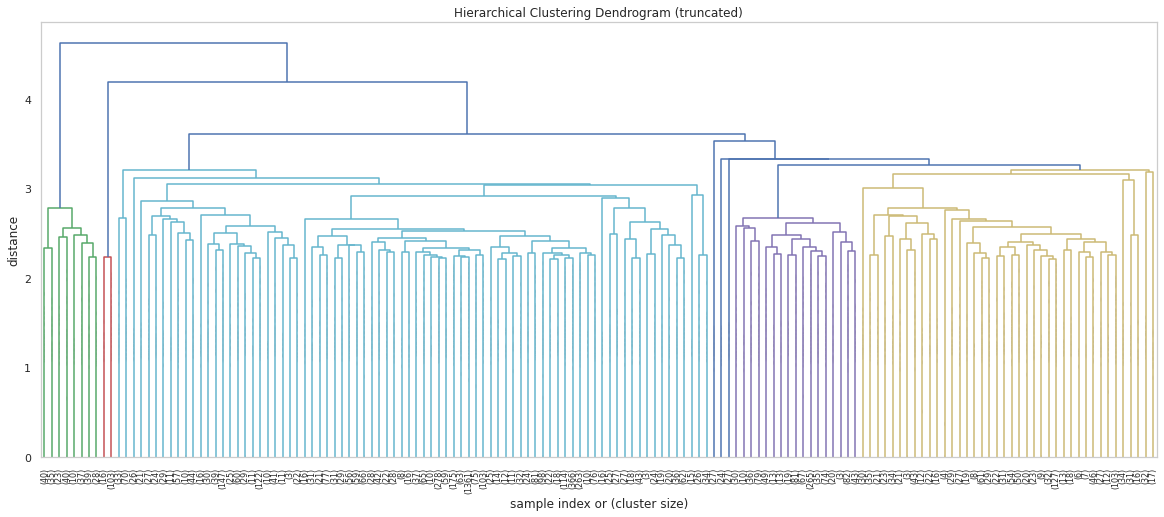

In [ ]:
plt.figure(figsize=(20,8))
fancy_dendrogram(
    ward_cluster,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
    annotate_above=10,
    max_d=None,  # plot a horizontal cut-off line
)
plt.grid(False)
plt.show()

If this is the first time you see a dendrogram, it's probably quite confusing, so let's take this apart...

  * On the x axis you see labels. If you don't specify anything else they are the indices of your samples in X.
  *  On the y axis you see the distances (of the 'ward' method in our case).




#### Optimal number of clusters
Let's have a look at last 35 distancees and try to comment on what is a good number for number of clusters, the sudden jump in the distances is what we are aiming for, let's have a look,

In [ ]:
ward_cluster[-35:,2]

array([2.63616678, 2.65299654, 2.65543078, 2.65879533, 2.66761484,
       2.67210456, 2.68890998, 2.68901769, 2.6985852 , 2.70685141,
       2.75646512, 2.77537936, 2.77720709, 2.77809704, 2.78045163,
       2.85736937, 2.88719529, 2.9137111 , 2.92393495, 3.00377073,
       3.03072783, 3.04455896, 3.09380189, 3.10941581, 3.15607099,
       3.17676025, 3.20050107, 3.20487021, 3.25961067, 3.32984909,
       3.33143883, 3.52163234, 3.60680256, 4.18420488, 4.6202023 ])

The distances seems too close, noticeable jump is at last 2nd, meaning we can have two good clusters.

Get the differential jump of last thirty distances,

In [ ]:
# Reverse the order 
temp_distances = ward_cluster[-35:,2][::-1]
jump = []  # The difference will be saved in this list
# Iterate through the list of distances
for i in range(30):
  jump.append(temp_distances[i]-temp_distances[i+1]) # Append the distance difference between current and next distance

# Get the distance jump list
jump

[0.435997416313068,
 0.5774023181053929,
 0.08517021849316508,
 0.1901935104568353,
 0.001589745858736169,
 0.0702384173246231,
 0.05474046322646586,
 0.004369141529287468,
 0.02374081978911624,
 0.020689255806588314,
 0.04665518248503275,
 0.015613917420968626,
 0.049242931495243614,
 0.013831129639199968,
 0.026957095340499393,
 0.07983578546677084,
 0.01022385124487668,
 0.02651581067245612,
 0.029825920988487464,
 0.0769177380998447,
 0.002354582333305988,
 0.0008899571463669709,
 0.0018277301342681795,
 0.018914235524936096,
 0.04961371277931814,
 0.008266204816927747,
 0.009567516174564972,
 0.0001077086194491983,
 0.01680542367734361,
 0.004489719088712096]

Now, the problem is having only 2 clusters won't able to capture the diversity in the content, so we will look at what are next viable number of clusters...

In [ ]:
# Make a copy of jump, otherwise the original jump list will get changed, always make a copy i.e. a good habit
temp_jump = jump.copy()

# Get sorted_jump list
sorted_jump = sorted(temp_jump)[::-1] # Reverse it here since, sorted method sorts in ascending fashion

# Get next best number of clusters in this list
number_of_clusters=[]
for i in range(len(sorted_jump)):
  number_of_clusters.append(jump.index(sorted_jump[i])+1) # append the number+1 (as the number represents index, while number+1 represents the number of cluster)here

# We have to reverse it since on appending the 
number_of_clusters

[2,
 1,
 4,
 3,
 16,
 20,
 6,
 7,
 25,
 13,
 11,
 19,
 15,
 18,
 9,
 10,
 24,
 29,
 12,
 14,
 17,
 27,
 26,
 30,
 8,
 21,
 23,
 5,
 22,
 28]

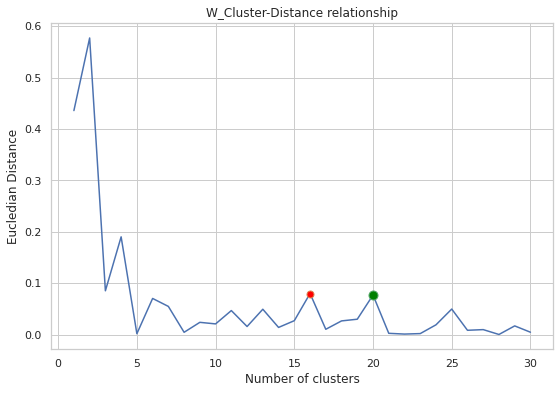

In [ ]:
# Get plot of distances and their respective no. of clusters (i.e. indices+1)
plt.figure(figsize=(9,6))
sns.lineplot(x=range(1,len(jump)+1), y=jump, markers=True)
plt.xlabel('Number of clusters')
plt.ylabel('Eucledian Distance')
plt.title('W_Cluster-Distance relationship')

# Plot some considerable points
plt.plot(16,jump[16-1],marker="o", markerfacecolor="red",markersize=7)
plt.plot(20,jump[20-1],marker="o", markerfacecolor="green",markersize=9)

We may go for 20 clusters since the distance jump between 16 and 20 is not much, and 20 clusters will provide better separation than 16 clusters.

Let's check out silhouette scores and then decide the optimal number of clusters.


#### Silhouette Score for optimal clusters

In [ ]:
def find_w_optimal_clusters(dataset_list, labels_list,color_list):
  for i in range(len(dataset_list)):
    data = dataset_list[i]
    label = labels_list[i]
    paint = color_list[i]

    print("***"*5,f"Working on {label}","***"*5)
    print(" ")
    # Choosing the max number of clusters based on the dimension of the data
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    if len(data.columns)>500:
      params = (np.linspace(2,100,10)).astype(int)
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    else:
      params = (np.linspace(2,len(data.columns),10)).astype(int)

    iters = params
    ss = []

    for k in iters:
      # Create model and get necessary attributes
      model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward').fit(data)
      model_labels = model.labels_

      ss.append(silhouette_score(data, model_labels))

    plt.figure(figsize=(8,6))
    # Plot silhouette score plot
    sns.barplot(iters,ss,color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('Silhouette score',fontsize=13)
    plt.title(f'Silhouette score plot for {label}',fontsize=18,color=paint)

    plt.show()
    # Print optimal number of clusters
    print(" ")
    best_cluster_centers = params[ss.index(max(ss))]
    print("---"*10)
    print(f"For dataset {label}, optimal number of clusters are {best_cluster_centers}")
    print("---"*10)
    print(" ")

*************** Working on description ***************
 


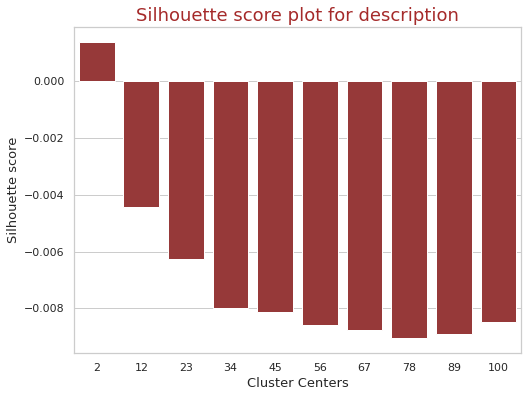

 
------------------------------
For dataset description, optimal number of clusters are 2
------------------------------
 
*************** Working on genres ***************
 


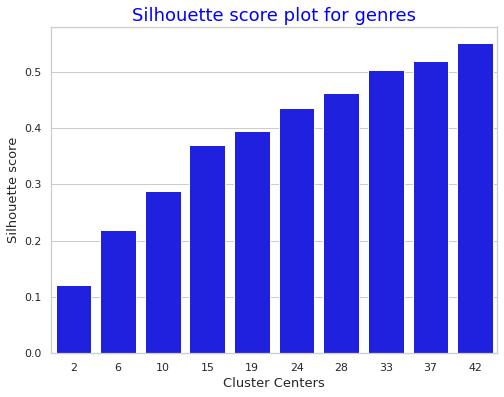

 
------------------------------
For dataset genres, optimal number of clusters are 42
------------------------------
 
*************** Working on country_rating_genres_type ***************
 


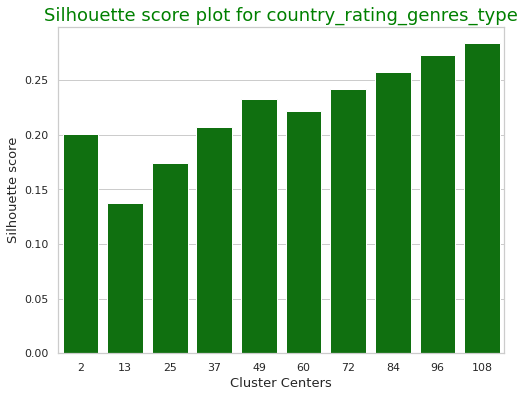

 
------------------------------
For dataset country_rating_genres_type, optimal number of clusters are 108
------------------------------
 


In [ ]:
dataset_list = [d,genres,crgt]
labels_list = ['description','genres','country_rating_genres_type']
color_list = ['brown','blue','green']
# Get the silhouette score method rolling
find_w_optimal_clusters(dataset_list, labels_list,color_list)

####<u>Inference</u> : No suitable number of cluster value for description dataset so, we shouldn't waste our time on training a ward model on description dataset.

For genres and crgt dataset optimal number of clusters are 42 and 108 these are same numbers as given by KMeans.

Let's train the model and visualize the clusters

###Training Hierarchical ward clustering model 

In [122]:
# Training the hierarchical clustering models based on 
w_clusters_d = AgglomerativeClustering(n_clusters = 28, affinity = 'euclidean', linkage = 'ward').fit_predict(d)
# Fit genres data
w_clusters_genres = AgglomerativeClustering(n_clusters = 42, affinity = 'euclidean', linkage = 'ward').fit_predict(genres)
# Fit crgt data
w_clusters_crgt = AgglomerativeClustering(n_clusters = 108, affinity = 'euclidean', linkage = 'ward').fit_predict(crgt)

#### Performance check [Model: ward clustering]

#####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [123]:
# Davies bouldin score, closer to 0 means better partition
print(f'davies_bouldin_score for description data : {davies_bouldin_score(d, w_clusters_d)}')

print(f'davies_bouldin_score for genres data : {davies_bouldin_score(genres, w_clusters_genres)}')

print(f'davies_bouldin_score for crgt data : {davies_bouldin_score(crgt, w_clusters_crgt)}')

davies_bouldin_score for description data : 8.759216140336052
davies_bouldin_score for genres data : 1.1059625032073515
davies_bouldin_score for crgt data : 1.756324535905783


In [124]:
# Silhouette score, closer to 1 means better partition
print(f'Silhouette_score for description data : {silhouette_score(d, w_clusters_d)}')

print(f'Silhouette_score for genres data : {silhouette_score(genres, w_clusters_genres)}')

print(f'Silhouette_score for crgt data : {silhouette_score(crgt, w_clusters_crgt)}')

Silhouette_score for description data : -0.007582068250289787
Silhouette_score for genres data : 0.5516215466057381
Silhouette_score for crgt data : 0.2843811728870197


<u>Observation</u> : Silhouette score for Ward clustering on datasets genres and crgt are better than those of MiniBatchKMeans clustering. A negative score for description data, [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

### Have a look at the results

####<u><b>Plot the clusters</u></b>

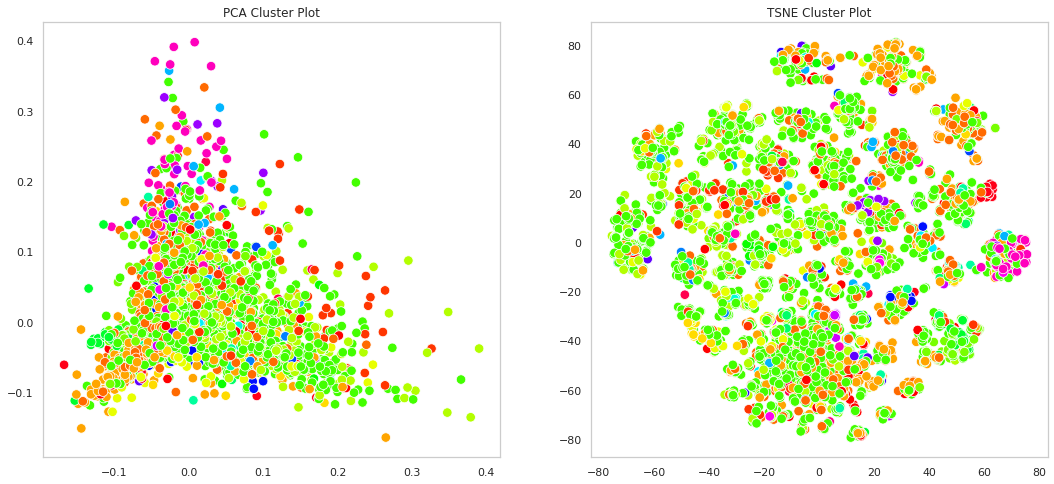

In [151]:
# Visualize the clusters in description dataset
plot_tsne_pca(d, w_clusters_d)

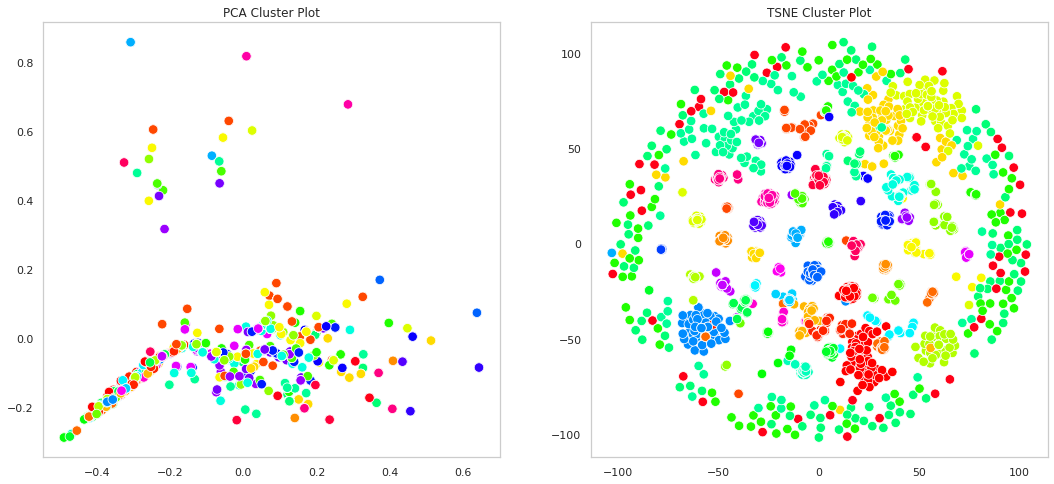

In [149]:
# Visualize the clusters in genres dataset
plot_tsne_pca(genres, w_clusters_genres)

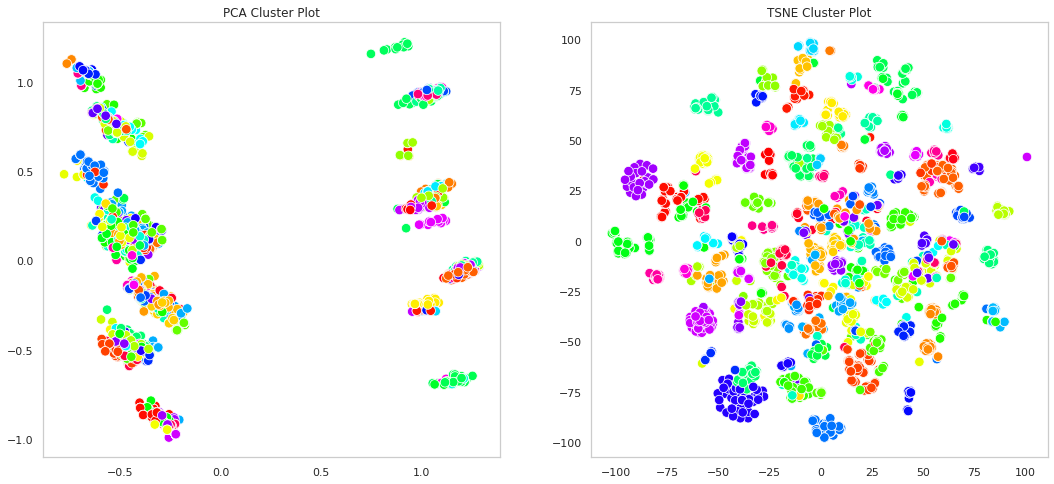

In [150]:
# Visualize the clusters in country_rating_genres_type dataset
plot_tsne_pca(crgt, w_clusters_crgt)

##### Inference : There is a huge cluster that is overlapping other cluster in case of d dataset.The cluster separation Looks slightly better than KMeans clustering for genres and crgt dataset. 

#### Check out the results

The cluster size variation looks like... 
 


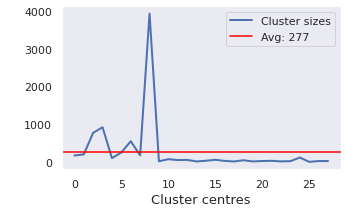

 
The keywords in the largest cluster are, 
takes,father,mysterious,years,past,girl,help,group,lives,home,finds,friends,world,woman,love,man,new,life,family,young
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
8   takes,father,mysterious,years,past,girl,help,g...          3922   
3   share,tour,look,career,lives,interviews,footag...           919   
2   fun,space,wild,fight,learn,life,young,day,miss...           773   
6   home,wealthy,new,bond,romance,years,finds,retu...           550   
5   based,man,true,thriller,novel,notorious,involv...           252   
1   better,turned,man,50,upside,family,decide,fate...           202   
7   observations,parenting,hart,kevin,set,diverse,...           177   
0   favorite,home,chef,chefs,mouse,world,social,se...           174   
24  study,college,teachers,girls,senior,bus,monste...           119   
4   targeting,team,case,elaborate,problems,use,pol...           103   
10  hilarious,humor,shares,german,discusses,cultur...            75   
15  ambitious,falls,classmate,transfer,engineering...            60   
12  sport,comeback,cricket,athlete,young,wing,fans...            56   
11  elite,drawn,intelligence,service,squad,cell,as...            52   
18  deal,turn,case,friends,family,undercover,save,...            47   
14  hell,shows,heart,families,special,little,comed...            34   
21  surprise,daredevil,california,comic,tackles,wo...            32   
16  plans,hope,years,encounters,failing,young,wild...            30   
20  funny,reality,officers,colorful,complex,indepe...            27   
27  story,based,harrowing,events,topsecret,forces,...            27   
26  cop,bad,strangers,mafia,car,ordinary,charming,...            26   
23  criminal,ring,action,expert,involving,school,h...            24   
9   hide,mysterious,relationship,teenage,corruptio...            21   
22  christmas,dark,forces,search,force,use,army,te...            17   
13  provide,coma,grapples,independent,father,home,...            16   
19  missions,love,duties,matters,city,women,rival,...            16   
17  contemporary,acting,tracks,england,school,seri...            15   
25  feature,fatherhood,father,fathers,favorite,fbi...             4   

                                      Similar_content  
8   [3%, 7:19, 23:59, 21, 46, 122, 706, 1920, 1922...  
3   [1994, 2,215, '89, (T)ERROR, #blackAF, 13 Reas...  
2   [9, 3022, 15-Aug, #FriendButMarried 2, 100 Day...  
6   [Feb-09, ¡Ay, mi madre!, Ég man þig, 10,000 B....  
5   [3 Deewarein, 30 Minutes or Less, 365 Days, 5 ...  
1   [​Goli Soda 2, 5 to 7, A Ghost Story, A Good W...  
7   [(Un)Well, 72 Dangerous Places to Live, A Nigh...  
0   [#Alive, 42 Grams, 5CM, 90 ML, A Perfect Endin...  
24  [#Rucker50, 1 Chance 2 Dance, 1 Mile to You, 1...  
4   [Oct-01, Afflicted, Against the Tide, Along Ca...  
10  [A Very Murray Christmas, Adam Ruins Everythin...  
15  [A Serious Man, Age of Rebellion, Ajaibnya Cin...  
12  [2015 Dream Concert, A Kid from Coney Island, ...  
11  [A Wednesday, Act of Valor, Agent, All the Dev...  
18  [A Queen Is Born, Abdullah, The Final Witness,...  
14  [A Go! Go! Cory Carson Christmas, A Russell Pe...  
21  [187, After Maria, An American Tail: The Myste...  
16  [4L, American Honey, Buddies, Calibre, Düğün D...  
20  [1BR, A Week in Watts, Bottom of the World, Bu...  
27  [A Bridge Too Far, Alexandria ... Why?, Camp X...  
26  [Accidentally in Love, After, All Dogs Go to H...  
23  [Chhota Bheem Kungfu Dhamaka, Crouching Tiger,...  
9   [Big Stone Gap, Broadchurch, Candy Online, Hem...  
22  [Mighty Morphin Power Rangers, Power Rangers D...  
13  [20th Century Women, 3 Generations, And Breath...  
19  [A Home with A View, Casino Tycoon, Chasing th...  
17  [Cheer, Dancing Angels, Everything Sucks!, I H...  
25  [Baahubali: The Beginning (English Version), B...

In [138]:
# Get clusters info for genres dataset
get_cluster_info(d, w_clusters_d)

The cluster size variation looks like... 
 


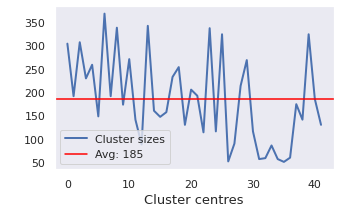

 
The keywords in the largest cluster are, 
dramas,independentmovies
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
6                      dramas,independentmovies           367   
13                             dramas,thrillers           341   
8           internationalmovies,actionadventure           337   
23                       comedies,documentaries           336   
39                  documentaries,standupcomedy           323   
25                   internationalmovies,dramas           323   
2             internationalmovies,musicmusicals           306   
0                             tvcomedies,kidstv           303   
10                       thrillers,horrormovies           270   
29                              dramas,comedies           268   
4                  internationalmovies,comedies           258   
18                  dramas,childrenfamilymovies           253   
17                      comedies,romanticmovies           232   
3          internationaltvshows,romantictvshows           229   
28                        dramas,romanticmovies           213   
20                 actionadventure,scififantasy           205   
21          internationaltvshows,britishtvshows           192   
7                    documentaries,sportsmovies           191   
1              tvscififantasy,tvactionadventure           191   
40                comedies,childrenfamilymovies           185   
37            internationalmovies,documentaries           174   
9                       crimetvshows,docuseries           173   
14                          tvdramas,tvcomedies           160   
16               internationaltvshows,realitytv           157   
5                          tvdramas,tvmysteries           148   
15                internationaltvshows,tvdramas           147   
11           internationaltvshows,koreantvshows           141   
38                   comedies,independentmovies           141   
41                     comedies,actionadventure           130   
19                        tvdramas,crimetvshows           130   
24  internationaltvshows,spanishlanguagetvshows           116   
30                           tvthrillers,dramas           116   
22             internationaltvshows,animeseries           114   
27                         dramas,classicmovies            90   
12                           dramas,lgbtqmovies            88   
33                   docuseries,sciencenaturetv            86   
36                         tvdramas,teentvshows            60   
32                          comedies,cultmovies            59   
31                     dramas,faithspirituality            57   
34                actionadventure,animefeatures            57   
26                         documentaries,movies            52   
35            tvcomedies,standupcomedytalkshows            51   

                                      Similar_content  
6   [​​Kuch Bheege Alfaaz, 18 Presents, 20th Centu...  
13  [1922, Oct-01, 22-Jul, 26 Years, 3 Deewarein, ...  
8   [​Goli Soda 2, 10,000 B.C., 14 Blades, 16 Bloc...  
23  [(T)ERROR, 100 Years: One Woman's Fight for Ju...  
39  [A Russell Peters Christmas, Adam Devine: Best...  
25  [7:19, ​Maj Rati ​​Keteki, ​Mayurakshi, Òlòtūr...  
2   [20 Feet From Stardom, 2015 Dream Concert, 7 D...  
0   [44 Cats, Abby Hatcher, Akbar Birbal, Alexa & ...  
10  [23:59, 122, 706, 1920, #Alive, Ég man þig, 13...  
29  [#Selfie, #Selfie 69, 10 jours en or, 2 States...  
4   [#realityhigh, ¡Ay, mi madre!, Çarsi Pazar, Ço...  
18  [A Babysitter's Guide to Monster Hunting, A Ch...  
17  [#Roxy, 10 Days in Sun City, 5 to 7, 50 First ...  
3   [แผนร้ายนายเจ้าเล่ห์, 100 Days My Prince, 45 r...  
28  [#FriendButMarried, #FriendButMarried 2, 1 Cha...  
20  [9, 3022, Æon Flux, 2036 Origin Unknown, 2307:...  
21  [100% Hotter, 21 Again, Africa, After Life, Ag...  
7   [2,215, '89, #Rucker50, 1 Mile to You, 100 Met...  
1   [3%, 3Below: Tales of Arcadia, 7 (Seven), A Li...  
40  [48 Christmas Wishes, A Cinderella Story, A Fa...  
37  [#AnneFrank - Parallel Stories, #cats_the_mewv...  
9   [19

In [125]:
# Get clusters info for genres dataset
get_cluster_info(genres, w_clusters_genres)

The cluster size variation looks like... 
 


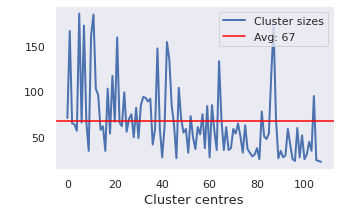

 
The keywords in the largest cluster are, 
dramas,comedies,pg13,movie,unitedstates
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
5              dramas,comedies,pg13,movie,unitedstates           185   
11      comedies,dramas,internationalmovies,tvma,movie           184   
7    crimetvshows,tvdramas,internationaltvshows,tvm...           172   
87   documentaries,standupcomedy,tvma,movie,uniteds...           171   
1    comedies,independentmovies,movie,tvma,unitedst...           166   
..                                                 ...           ...   
100    tvdramas,internationaltvshows,tv14,china,tvshow            26   
105      dramas,internationalmovies,movie,tvma,nigeria            25   
96   romantictvshows,internationaltvshows,tvma,taiw...            24   
106     animefeatures,actionadventure,tvma,movie,japan            24   
107  internationaltvshows,tvdramas,tvma,australia,t...            23   

                                       Similar_content  
5    [21, 17 Again, 20 Feet From Stardom, 28 Days, ...  
11   [#Selfie, #Selfie 69, Ég man þig, 100 Meters, ...  
7    [3%, 46, 1983, Şubat, 20 Minutes, Agent, AMO, ...  
87   [Adam Devine: Best Time of Our Lives, ADAM SAN...  
1    [1922, 6 Balloons, 6 Years, A Fall from Grace,...  
..                                                 ...  
100  [Accidentally in Love, Ashes of Love, Chosen, ...  
105  [Òlòtūré, 4th Republic, A Trip to Jamaica, Chi...  
96   [A Boy Name Flora A, A Taiwanese Tale of Two C...  
106  [37 Seconds, Altered Carbon: Resleeved, Berser...  
107  [Aunty Donna's Big Ol' House of Fun, Aussie Go...  

[108 rows x 3 columns]

In [126]:
# Get clusters info for crgt dataset
get_cluster_info(crgt, w_clusters_crgt)

#### Inference: The cluster size variation plots are comparatively smoother in case of ward clustering than KMeans clustering for genres and crgt dataset. But, in case of d dataset the size variation is lot worse comparatively.

## Gaussian Mixture Clustering

### Optimal number of clusters

In [85]:
def find_g_optimal_clusters(dataset_list, labels_list,color_list):
  """Function takes list of datasets,
  applies gaussian mixture clustering to them
  and returns the rough estimate of optimal number of clusters for each dataset"""
  sns.set()
  # Iterating through the dataset_list
  for i in range(len(dataset_list)):
    data = dataset_list[i]
    label = labels_list[i]
    paint = color_list[i]

    print("***"*5,f"Working on {label}","***"*5)
    print(" ")
    # Choosing the max number of clusters based on the dimension of the data
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    if len(data.columns)>500:
      params = (np.linspace(2,500,10)).astype(int)
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    else:
      params = (np.linspace(2,len(data.columns),10)).astype(int)

    iters = params
    ss = []

    # Iterating through the parameters
    for k in iters:
      # Create model and get necessary attributes
      model = GaussianMixture(n_components = k,max_iter = 1000,init_params='kmeans',random_state=20).fit(data)
      model_labels = model.predict(data)

      # Get performance scores
      ss.append(silhouette_score(data, model_labels))

    plt.figure(figsize=(9,6))

    # Plot silhouette score plot
    sns.barplot(iters,ss,color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('Silhouette score',fontsize=13)
    plt.title(f'Silhouette score plot for {label}',fontsize=18,color=paint)

    plt.show()
    # Print optimal number of clusters
    print(" ")
    best_cluster_centers = params[ss.index(max(ss))]
    print("---"*10)
    print(f"For dataset {label}, optimal number of clusters are {best_cluster_centers}")
    print("---"*10)
    print(" ")

*************** Working on genres ***************
 


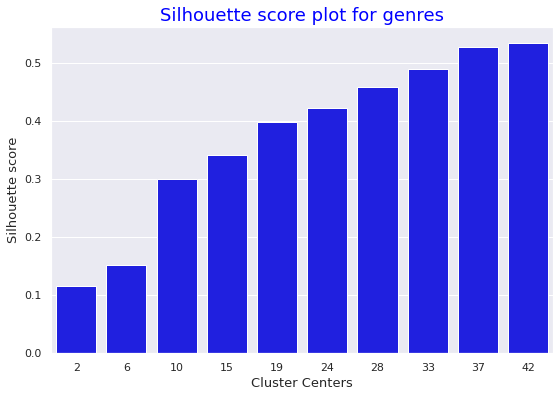

 
------------------------------
For dataset genres, optimal number of clusters are 42
------------------------------
 
*************** Working on country_rating_genres_type ***************
 


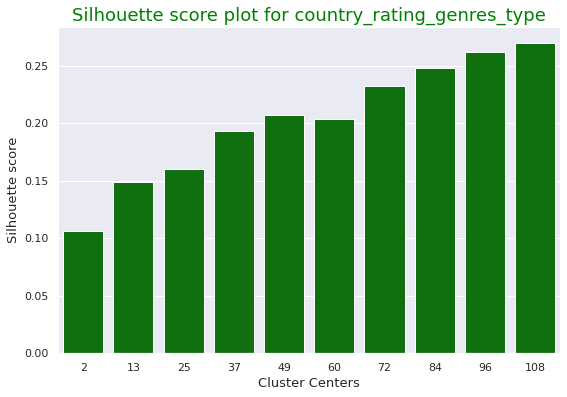

 
------------------------------
For dataset country_rating_genres_type, optimal number of clusters are 108
------------------------------
 


In [86]:
# Create dataset_list, labels_list and the color_list
dataset_list = [genres,crgt]
labels_list = ['genres','country_rating_genres_type']
color_list = ['blue','green']

# Find the optimal number of clusters using find_optimal_clusters
find_g_optimal_clusters(dataset_list, labels_list,color_list)

The Gaussian mixture did not converge for distribution dataset. It crashed the system.

For the genres and crgt datasets, it found same number of optimal clusters like ward clustering, 42 and 108 respectively.

###Training Gaussian Mixture clustering model 

In [127]:
# Training the gaussian mixture clustering models based on datasets
# Fit genres data
g_clusters_genres = GaussianMixture(n_components = 42,max_iter = 1000,init_params='kmeans',random_state=20).fit_predict(genres)

# Fit crgt data
g_clusters_crgt = GaussianMixture(n_components = 108,max_iter = 1000,init_params='kmeans',random_state=20).fit_predict(crgt)

#### Performance check [Model: ward clustering]

#####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [128]:
# Davies bouldin score, closer to 0 means better partition
print(f'davies_bouldin_score for genres data : {davies_bouldin_score(genres, g_clusters_genres)}')

print(f'davies_bouldin_score for crgt data : {davies_bouldin_score(crgt, g_clusters_crgt)}')

davies_bouldin_score for genres data : 1.239591149508634
davies_bouldin_score for crgt data : 1.9399551691186128


In [129]:
# Silhouette score, closer to 1 means better partition
print(f'Silhouette_score for genres data : {silhouette_score(genres, g_clusters_genres)}')

print(f'Silhouette_score for crgt data : {silhouette_score(crgt, g_clusters_crgt)}')

Silhouette_score for genres data : 0.5346246740234096
Silhouette_score for crgt data : 0.26998306285542706


<u>Observation</u> : Score on both datasets are worse than those of Ward clustering. Although, the score on genres dataset is worse than MiniBatchKMeans, the score on crgt dataset is slightly better than MiniBatchKMeans.

### Have a look at the results

####<u><b>Plot the clusters</u></b>

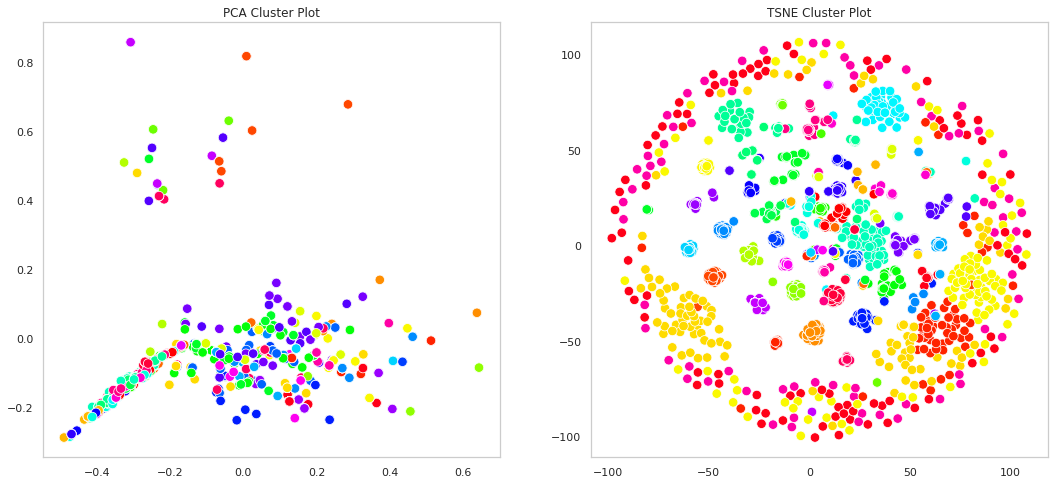

In [90]:
# Visualize the clusters in genres dataset
plot_tsne_pca(genres, g_clusters_genres)

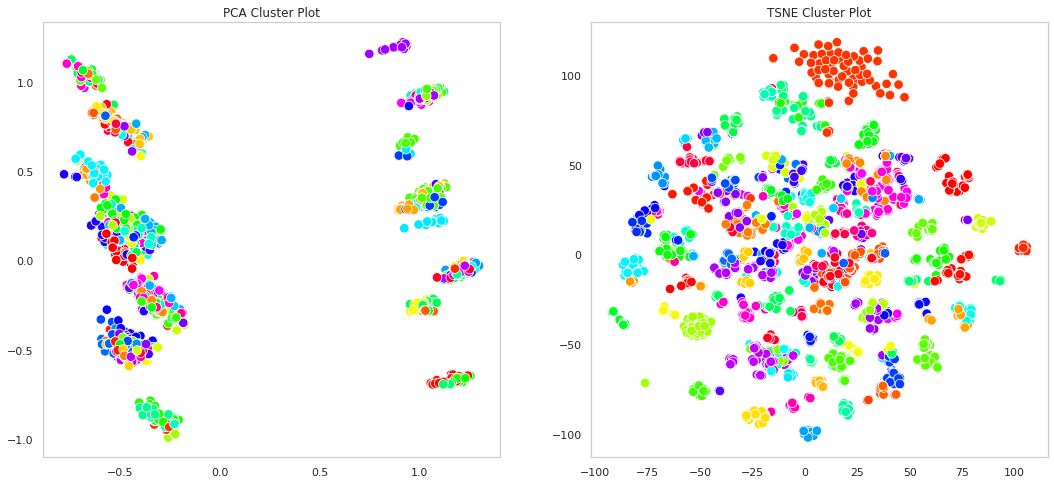

In [92]:
# Visualize the clusters in country_rating_genres_type dataset
plot_tsne_pca(crgt, g_clusters_crgt)

##### Inference : Gaussian Mixture clustering is giving decent performance in cluster separation. Because, there are overlapping clusters in some regions of the plots.

#### Check out the results

The cluster size variation looks like... 
 


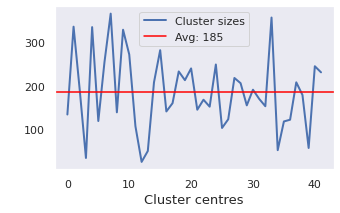

 
The keywords in the largest cluster are, 
internationalmovies,actionadventure
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
7           internationalmovies,actionadventure           366   
33                    lgbtqmovies,documentaries           357   
1                      dramas,independentmovies           336   
4                    internationalmovies,dramas           335   
9                   musicmusicals,standupcomedy           329   
15                       thrillers,horrormovies           282   
10                              dramas,comedies           272   
6                   dramas,childrenfamilymovies           255   
24                        dramas,romanticmovies           249   
40                         koreantvshows,kidstv           245   
20                internationaltvshows,tvdramas           240   
18                      crimetvshows,docuseries           233   
41                      comedies,romanticmovies           231   
27                comedies,childrenfamilymovies           218   
19                            kidstv,tvcomedies           213   
14                 actionadventure,scififantasy           208   
37                             dramas,thrillers           208   
28         internationaltvshows,romantictvshows           206   
30                   documentaries,sportsmovies           191   
2             internationalmovies,documentaries           190   
38               internationaltvshows,realitytv           179   
31            internationalmovies,musicmusicals           170   
22                 internationalmovies,comedies           168   
17                    docuseries,britishtvshows           160   
29                        tvdramas,crimetvshows           155   
32                   comedies,independentmovies           153   
23                     comedies,actionadventure           152   
21  internationaltvshows,spanishlanguagetvshows           145   
16             internationaltvshows,animeseries           141   
8                 internationalmovies,thrillers           139   
0              tvscififantasy,tvactionadventure           134   
26                           lgbtqmovies,dramas           123   
36           internationaltvshows,koreantvshows           122   
5                           tvdramas,tvcomedies           119   
35                          cultmovies,comedies           118   
11                  documentaries,musicmusicals           107   
25                         dramas,classicmovies           103   
39                     dramas,faithspirituality            57   
34                         documentaries,movies            52   
13                         tvdramas,tvthrillers            50   
3                standupcomedytalkshows,tvshows            34   
12                         docuseries,realitytv            25   

                                      Similar_content  
7   [​Goli Soda 2, 14 Blades, 25 Kille, 27, el clu...  
33  [(T)ERROR, 100 Years: One Woman's Fight for Ju...  
1   [​​Kuch Bheege Alfaaz, 18 Presents, 20th Centu...  
4   [7:19, ​Maj Rati ​​Keteki, ​Mayurakshi, Òlòtūr...  
9   [A Russell Peters Christmas, Adam Devine: Best...  
15  [23:59, 122, 706, 1920, #Alive, Ég man þig, 13...  
10  [#Selfie, #Selfie 69, 10 jours en or, 2 States...  
6   [A Babysitter's Guide to Monster Hunting, A Ch...  
24  [#FriendButMarried, #FriendButMarried 2, 1 Cha...  
40  [44 Cats, Abby Hatcher, Alphablocks, Ask the S...  
20  [3%, 46, Feb-09, 21 Sarfarosh: Saragarhi 1897,...  
18  [1994, 100 Humans, 13 Reasons Why: Beyond the ...  
41  [#Roxy, 10 Days in Sun City, 5 to 7, 50 First ...  
27  [48 Christmas Wishes, A Cinderella Story, A Ci...  
19  [#blackAF, A Little Help with Carol Burnett, A...  
14  [9, 3022, Æon Flux, 2036 Origin Unknown, 2307:...  
37  [1922, Oct-01, 22-Jul, 26 Years, 3 Deewarein, ...  
28  [แผนร้ายนายเจ้าเล่ห์, 100 Days My Prince, A Go...  
30  [2,215, '89, #Rucker50, 1 Mile to You, 100 Met...  
2   [#AnneFrank - Parallel Stories, #cats_the_mewv...  
38  [(Un)Well, 100% Hotter, 21 Again, 60 Days In, ...  
31  [20

In [130]:
# Get clusters info for genres dataset
get_cluster_info(genres, g_clusters_genres)

The cluster size variation looks like... 
 


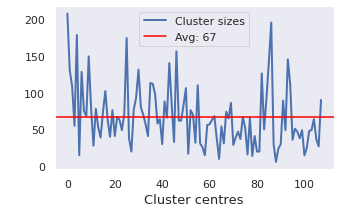

 
The keywords in the largest cluster are, 
dramas,internationalmovies,tvma,india,movie
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
0          dramas,internationalmovies,tvma,india,movie           207   
86   crimetvshows,tvdramas,internationaltvshows,tvm...           195   
4    musicmusicals,documentaries,tvma,unitedstates,...           178   
25   musicmusicals,standupcomedy,tvma,movie,uniteds...           174   
46    independentmovies,dramas,movie,tvma,unitedstates           156   
..                                                 ...           ...   
58   internationalmovies,actionadventure,tvma,movie...            15   
100      internationalmovies,comedies,egypt,movie,tvma            15   
78   romantictvshows,koreantvshows,southkorea,tvpg,...            14   
64             australia,unitedstates,tvy,movies,movie            10   
88   tvdramas,britishtvshows,unitedkingdom,tv14,tvshow             6   

                                       Similar_content  
0    [1920, 6-5=2, 7 Khoon Maaf, 90 ML, A Scandall,...  
86   [46, 1983, Şubat, 20 Minutes, A Very Secret Se...  
4    [13TH, 14 Minutes from Earth, 42 Grams, A Gray...  
25   [Adam Devine: Best Time of Our Lives, ADAM SAN...  
46   [6 Balloons, 6 Years, A Futile and Stupid Gest...  
..                                                 ...  
58   [Avengement, Close, Deathgrip, Derren Brown: T...  
100  [122, Alarmoty in the Land of Fire, An Upper E...  
78   [28 Moons, A Love So Beautiful, Abnormal Summi...  
64   [100 Things to do Before High School, Justice,...  
88   [Dracula, Father Brown, Jonathan Strange & Mr ...  

[108 rows x 3 columns]

In [131]:
# Get clusters info for crgt dataset
get_cluster_info(crgt, g_clusters_crgt)

#### Inference: The cluster size variation plots are smmoth (without inconsistency) in both the genres and crgt datasets.

## Spectral Clustering

### Optimal number of clusters

In [127]:
def find_s_optimal_clusters(dataset_list, labels_list,color_list):
  """Function takes list of datasets,
  applies spectral clustering to them
  and returns the rough estimate of optimal number of clusters for each dataset"""
  sns.set()
  # Iterating through the dataset_list
  for i in range(len(dataset_list)):
    data = dataset_list[i]
    label = labels_list[i]
    paint = color_list[i]

    print("***"*5,f"Working on {label}","***"*5)
    print(" ")
    # Choosing the max number of clusters based on the dimension of the data
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    if len(data.columns)>500:
      params = (np.linspace(2,100,10)).astype(int)
    # If the data dimension is above 500, then max number of clusters will be 500 due to the system's limitation
    else:
      params = (np.linspace(2,len(data.columns),10)).astype(int)

    iters = params
    ss = []

    # Iterating through the parameters
    for k in iters:
      # Create model and get necessary attributes
      model = SpectralClustering(n_clusters = k, affinity ='rbf',random_state=20)
      model_labels = model.fit_predict(data)

      # Get performance scores
      ss.append(silhouette_score(data, model_labels))

    plt.figure(figsize=(9,6))

    # Plot silhouette score plot
    sns.barplot(iters,ss,color=paint)
    plt.xlabel('Cluster Centers',fontsize=13)
    plt.ylabel('Silhouette score',fontsize=13)
    plt.title(f'Silhouette score plot for {label}',fontsize=18,color=paint)

    plt.show()
    # Print optimal number of clusters
    print(" ")
    best_cluster_centers = params[ss.index(max(ss))]
    print("---"*10)
    print(f"For dataset {label}, optimal number of clusters are {best_cluster_centers}")
    print("---"*10)
    print(" ")

*************** Working on description ***************
 


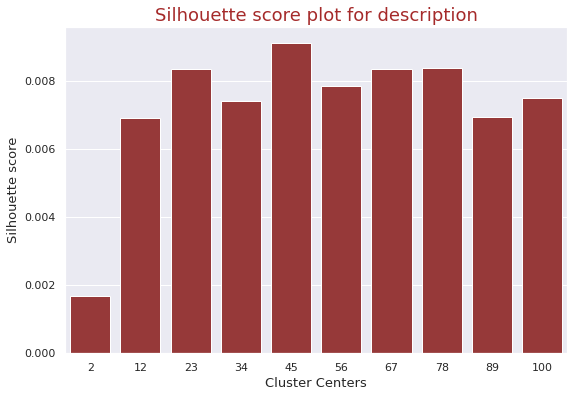

 
------------------------------
For dataset description, optimal number of clusters are 45
------------------------------
 
*************** Working on genres ***************
 


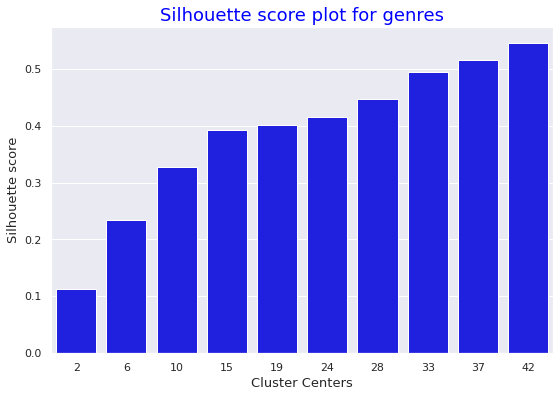

 
------------------------------
For dataset genres, optimal number of clusters are 42
------------------------------
 
*************** Working on country_rating_genres_type ***************
 


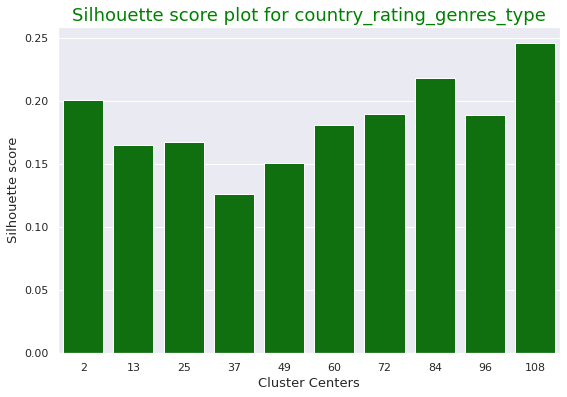

 
------------------------------
For dataset country_rating_genres_type, optimal number of clusters are 108
------------------------------
 


In [128]:
# Create dataset_list, labels_list and the color_list
dataset_list = [d,genres,crgt]
labels_list = ['description','genres','country_rating_genres_type']
color_list = ['brown','blue','green']

# Find the optimal number of clusters using find_optimal_clusters
find_s_optimal_clusters(dataset_list, labels_list,color_list)

In [131]:
# *******Investigating description dataset a little more*******

def investigate_deep_for_s_cluster(data,params):
  # candidate values for our number of cluster
  parameters = params
  
  ss = []
  # evaluation based on silhouette_score
  for k in parameters:
      # Create model and get necessary attributes
      model = SpectralClustering(n_clusters = k, affinity ='rbf',random_state=20)
      model_labels = model.fit_predict(data)

      # Get performance scores
      ss.append(silhouette_score(data, model_labels))

  # Plot silhouette score plot
  plt.figure(figsize=(9,6))
  sns.barplot(parameters,ss,color='brown')
  plt.xlabel('Cluster Centers',fontsize=13)
  plt.ylabel('Silhouette score',fontsize=13)
  plt.title(f'Silhouette score plot for description',fontsize=18,color='brown')
  plt.show()
  # Print optimal number of clusters
  print(" ")
  best_cluster_centers = parameters[ss.index(max(ss))]
  print("---"*10)
  print(f"For dataset description, optimal number of clusters are {best_cluster_centers}")
  print("---"*10)
  print(" ")

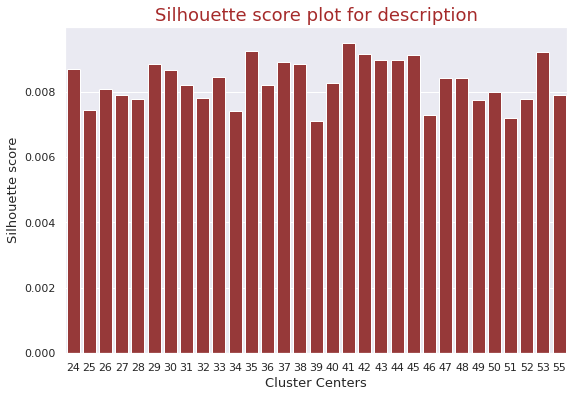

 
------------------------------
For dataset description, optimal number of clusters are 41
------------------------------
 


In [132]:
data = d.copy()
params = (np.linspace(24,55,31)).astype(int) # searching between 10 to 100

# Investigate deep
investigate_deep_for_s_cluster(data,params)

Inference : MiniBatchKMeans clustered the data in 28 optimal clusters, Ward clustering it was intelligible but we used 28 clusters, Gaussian Mixture clustering failed to work but Spectral clustering gave 41 optimal clusters on description dataset.

###Training Spectral clustering model 

In [132]:
# Training the Spectral clustering models based on datasets
s_clusters_d = SpectralClustering(n_clusters = 41, affinity ='rbf',random_state=20).fit_predict(d)
# Fit genres data
s_clusters_genres = SpectralClustering(n_clusters = 42, affinity ='rbf',random_state=20).fit_predict(genres)
# Fit crgt data
s_clusters_crgt = SpectralClustering(n_clusters = 108, affinity ='rbf',random_state=20).fit_predict(crgt)

#### Performance check [Model: ward clustering]

#####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [133]:
# Davies bouldin score, closer to 0 means better partition
print(f'davies_bouldin_score for description data : {davies_bouldin_score(d, s_clusters_d)}')

print(f'davies_bouldin_score for genres data : {davies_bouldin_score(genres, s_clusters_genres)}')

print(f'davies_bouldin_score for crgt data : {davies_bouldin_score(crgt, s_clusters_crgt)}')

davies_bouldin_score for description data : 8.136318245467663
davies_bouldin_score for genres data : 1.009861384634621
davies_bouldin_score for crgt data : 1.5670160130386706


In [134]:
# Silhouette score, closer to 1 means better partition
print(f'Silhouette_score for description data : {silhouette_score(d, s_clusters_d)}')

print(f'Silhouette_score for genres data : {silhouette_score(genres, s_clusters_genres)}')

print(f'Silhouette_score for crgt data : {silhouette_score(crgt, s_clusters_crgt)}')

Silhouette_score for description data : 0.009495836631390241
Silhouette_score for genres data : 0.5457438643427178
Silhouette_score for crgt data : 0.24653746413171063


<u>Observation</u> : Although spectral clustering is not working the best on genres and crgt datasets, it is working best for description dataset

### Have a look at the results

####<u><b>Plot the clusters</u></b>

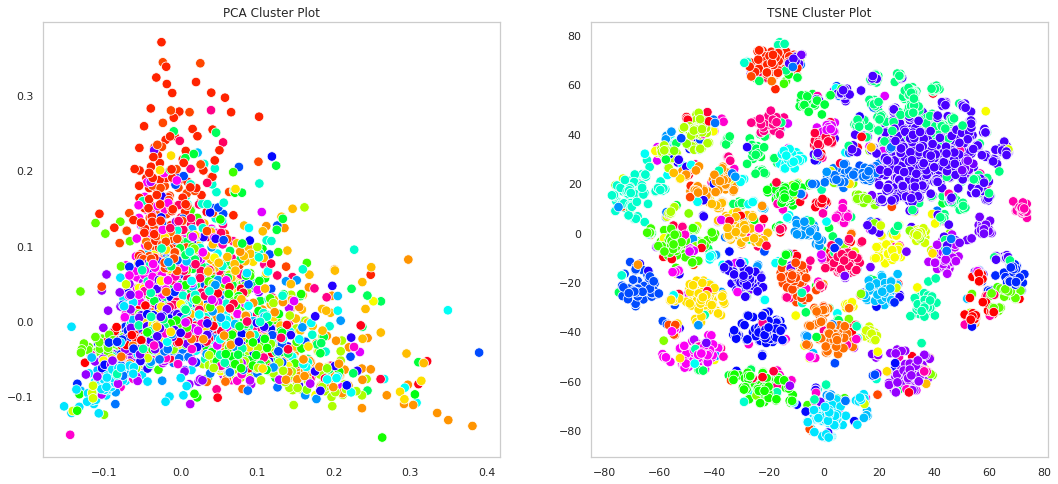

In [137]:
# Visualize the clusters in genres dataset
plot_tsne_pca(d, s_clusters_d)

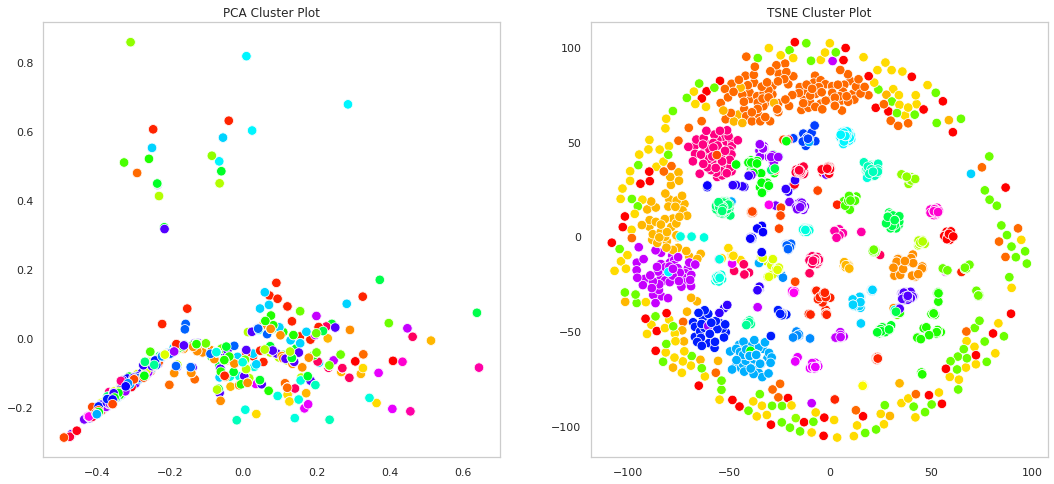

In [138]:
# Visualize the clusters in genres dataset
plot_tsne_pca(genres, s_clusters_genres)

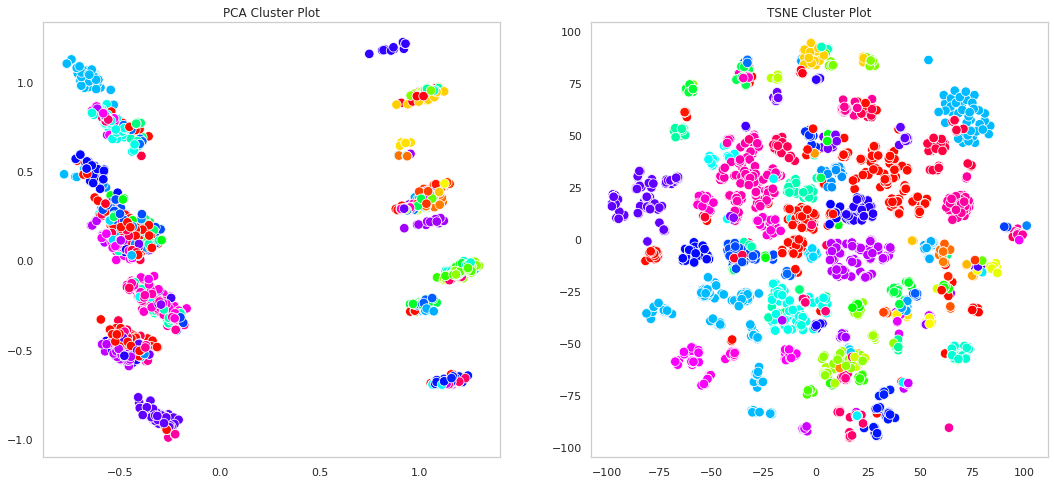

In [139]:
# Visualize the clusters in country_rating_genres_type dataset
plot_tsne_pca(crgt, s_clusters_crgt)

##### Inference : For description dataset, the spectral clustering is surely giving a best separation when compared with other models. For genres and crgt dataset it is intelligible how its performing.

#### Check out the results

The cluster size variation looks like... 
 


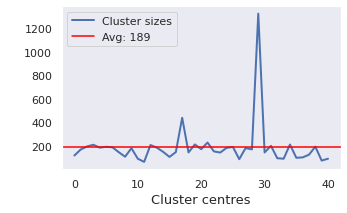

 
The keywords in the largest cluster are, 
search,india,stop,journey,human,government,city,mysterious,student,american,forces,learn,mission,crew,drug,evil,history,earth,battle,power
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
29  search,india,stop,journey,human,government,cit...          1323   
17  big,meets,way,job,couples,real,wife,relationsh...           440   
21  details,traces,intimate,american,rise,profiles...           230   
19  real,way,inspiration,romance,girl,moves,whos,s...           214   
34  celebrate,party,teamwork,begin,treasure,trip,f...           213   
3   star,make,learning,learn,scientists,battle,big...           211   
12  brother,siblings,husband,woman,moves,struggles...           209   
31  original,explores,features,hit,action,family,a...           202   
2   foe,christmas,break,writer,power,leads,hes,lif...           197   
38  walks,comes,whos,job,set,explores,personal,boo...           195   
5   soon,comes,teen,student,married,falling,relati...           194   
25  childhood,series,force,life,island,help,countr...           193   
6   make,expert,family,mysteries,home,tries,old,re...           190   
13  life,personal,family,intersect,upside,wife,upe...           187   
4   pregnant,meeting,shes,relationship,stop,missin...           187   
24  twisted,sets,dark,prison,corruption,suspect,of...           185   
27  camp,series,love,terrorist,diverse,help,follow...           183   
9   soon,plans,tries,meets,married,hit,accident,my...           182   
20  world,whos,raised,missing,returns,husband,love...           174   
28  murder,couple,new,love,childhood,30,20,young,l...           172   
1   bus,elite,secret,senior,attend,classmates,love...           171   
22  live,career,job,love,pop,woman,special,dark,yo...           155   
14  womans,pursuit,england,india,orphan,life,soon,...           151   
16  marry,new,make,rich,heart,village,befriends,mo...           149   
7   army,rangers,fight,fights,holiday,life,superhe...           148   
18  championship,local,criminal,new,save,national,...           146   
30  follows,bollywood,life,pop,history,musical,roc...           146   
23  help,tragic,struggles,grieving,family,father,r...           145   
37  characters,adventures,murder,remote,seaside,lo...           127   
0   raunchy,live,guests,unique,hilarious,night,tro...           120   
8   army,fight,mission,battles,documentary,fighter...           110   
15  high,reveals,murder,attempts,mysterious,colleg...           108   
36  status,celebrities,intimate,interviews,past,ho...           104   
35  romantic,new,lives,secret,stories,mother,looki...           101   
32  family,notorious,trapped,mexican,thriller,tell...            97   
33  estranged,make,save,kidnapped,young,teenage,de...            93   
10  detective,man,deadly,forces,cops,commit,true,p...            93   
40  threatens,light,memories,new,work,mysterious,h...            93   
26  thoughts,filmed,star,celebrity,live,observatio...            89   
39  moon,boyfriend,man,faith,starts,husband,help,t...            77   
11  unleashes,playful,weddings,york,takes,shares,s...            66   

                                      Similar_content  
29  [3%, 23:59, 46, 1920, 3022, ​​Kuch Bheege Alfa...  
17  [706, #Selfie, 16 Blocks, 17 Again, 2 States, ...  
21  [2,215, #AnneFrank - Parallel Stories, #cats_t...  
19  [Òlòtūré, 14 Cameras, A Cinderella Story: Chri...  
34  [#FriendButMarried 2, #Selfie 69, 3 Idiots, 44...  
3   [2015 Dream Concert, A Billion Colour Story, A...  
12  [A Boy Name Flora A, A California Christmas, A...  
31  [#blackAF, 13 Reasons Why, 72 Cutest Animals, ...  
2   [1994, 5 to 7, A Christmas Catch, A Most Viole...  
38  [7:19, 21 & Over, 9 Months That Made You, A Se...  
5   [100 Days My Prince, 365 Days, A Love So Beaut...  
25  [13 Cameras, 300 Miles to Heaven, A Christmas ...  
6   [#Alive, 100 Meters, 30 Days of Luxury, 45 rpm...  
13  [​Goli Soda 2, 10 jours en or, 3 Türken & ein ...  
4   [¡Ay, mi madre!, 1000 Rupee Note, 1BR, 7 Khoon...  
24  [1983, 20 Minutes, 27, el club de los malditos...  
27  [9, 21, 21 Again, 3 Seconds Divorce, 40 Sticks...  
9   [10 Days in Sun City, 13 Sins, 24 Hours to Liv

In [135]:
# Get clusters info for genres dataset
get_cluster_info(d, s_clusters_d)

The cluster size variation looks like... 
 


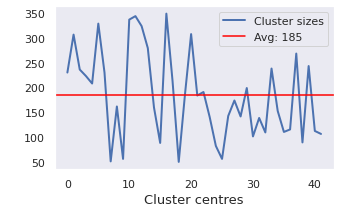

 
The keywords in the largest cluster are, 
internationalmovies,dramas
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
16                   internationalmovies,dramas           348   
11                             dramas,thrillers           343   
10                       comedies,documentaries           336   
5                      dramas,independentmovies           328   
12                  documentaries,standupcomedy           323   
20                     comedies,actionadventure           307   
1             internationalmovies,musicmusicals           306   
13                       thrillers,horrormovies           279   
37                              dramas,comedies           268   
39                        dramas,romanticmovies           243   
33          internationalmovies,actionadventure           238   
2                           tvdramas,tvcomedies           236   
0                  internationalmovies,comedies           230   
6                       comedies,romanticmovies           230   
3                   dramas,childrenfamilymovies           223   
17                           tvthrillers,kidstv           213   
4                  actionadventure,scififantasy           208   
29          internationaltvshows,britishtvshows           199   
22                   documentaries,sportsmovies           191   
19                comedies,childrenfamilymovies           185   
21            internationalmovies,documentaries           184   
27                      crimetvshows,docuseries           174   
8                internationaltvshows,realitytv           162   
14             tvscififantasy,tvactionadventure           160   
34                   comedies,independentmovies           153   
26             internationaltvshows,animeseries           143   
28           internationaltvshows,koreantvshows           142   
23  internationaltvshows,spanishlanguagetvshows           141   
31                        tvdramas,crimetvshows           139   
36                           tvthrillers,dramas           116   
40                internationaltvshows,tvdramas           113   
35                   romantictvshows,tvcomedies           111   
32                         tvhorror,tvmysteries           110   
41                     tvdramas,romantictvshows           107   
30                         dramas,classicmovies           102   
38                            tvcomedies,kidstv            90   
15                    documentaries,lgbtqmovies            89   
24                   docuseries,sciencenaturetv            83   
9                      dramas,faithspirituality            57   
25                actionadventure,animefeatures            57   
7                          documentaries,movies            52   
18            tvcomedies,standupcomedytalkshows            51   

                                      Similar_content  
16  [7:19, ​Maj Rati ​​Keteki, ​Mayurakshi, Òlòtūr...  
11  [1922, Oct-01, 22-Jul, 26 Years, 3 Deewarein, ...  
10  [(T)ERROR, 100 Years: One Woman's Fight for Ju...  
5   [​​Kuch Bheege Alfaaz, 18 Presents, 20th Centu...  
12  [A Russell Peters Christmas, Adam Devine: Best...  
20  [#realityhigh, 10,000 B.C., 16 Blocks, 17 Agai...  
1   [20 Feet From Stardom, 2015 Dream Concert, 7 D...  
13  [23:59, 122, 706, 1920, #Alive, Ég man þig, 13...  
37  [#Selfie, #Selfie 69, 10 jours en or, 2 States...  
39  [#FriendButMarried, #FriendButMarried 2, 1 Cha...  
33  [​Goli Soda 2, 14 Blades, 25 Kille, 6 Days, 6 ...  
2   [#blackAF, A Boy Name Flora A, A.D. Kingdom an...  
0   [¡Ay, mi madre!, Çarsi Pazar, Çok Filim Hareke...  
6   [#Roxy, 10 Days in Sun City, 5 to 7, 50 First ...  
3   [A Babysitter's Guide to Monster Hunting, A Ch...  
17  [44 Cats, Abby Hatcher, Alphablocks, Ask the S...  
4   [9, 3022, Æon Flux, 2036 Origin Unknown, 2307:...  
29  [100% Hotter, 21 Again, Africa, After Life, Ag...  
22  [2,215, '89, #Rucker50, 1 Mile to You, 100 Met...  
19  [48 Christmas Wishes, A Cinderella Story, A Fa...  
21  [#AnneFrank - Parallel Stories, #cats_the_mewv...  
27  [19

In [136]:
# Get clusters info for genres dataset
get_cluster_info(genres, s_clusters_genres)

The cluster size variation looks like... 
 


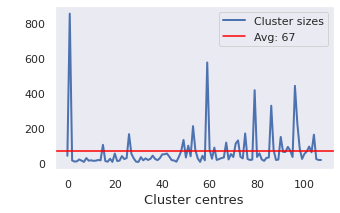

 
The keywords in the largest cluster are, 
independentmovies,documentaries,dramas,unitedstates,movie
 
The resultant dataframe of cluster info is... 
 


Top_keywords  Cluster_size  \
1   independentmovies,documentaries,dramas,uniteds...           856   
59        dramas,internationalmovies,india,tv14,movie           576   
96     comedies,dramas,internationalmovies,tvma,movie           442   
79     dramas,actionadventure,tvma,movie,unitedstates           417   
86   actionadventure,comedies,unitedstates,pg13,movie           328   
..                                                ...           ...   
46               tvcomedies,kidstv,tvy7,france,tvshow             7   
56                 tvcomedies,kidstv,india,tvy,tvshow             6   
7         kidstv,koreantvshows,tvy7,southkorea,tvshow             6   
30    sciencenaturetv,realitytv,tvpg,australia,tvshow             6   
19             tvcomedies,kidstv,tvy,australia,tvshow             6   

                                      Similar_content  
1   [23:59, 187, 3022, 22-Jul, (T)ERROR, 100 Thing...  
59  [706, 15-Aug, ​​Kuch Bheege Alfaaz, ​Goli Soda...  
96  [7:19, 122, 2,215, #Alive, #Selfie, #Selfie 69...  
79  [1922, 12 ROUND GUN, 14 Cameras, 1BR, 1st Summ...  
86  [9, 21, Æon Flux, 10,000 B.C., 16 Blocks, 17 A...  
..                                                ...  
46  [Code Lyoko, Heidi, Miraculous: Tales of Ladyb...  
56  [Chhota Bheem, ChuChu TV Nursery Rhymes & Kids...  
7   [Flowering Heart, Hidden Singer, Miniforce X, ...  
30  [72 Cutest Animals, 72 Dangerous Places to Liv...  
19  [Beat Bugs, Izzy's Koala World, Kazoops!, Moto...  

[108 rows x 3 columns]

In [137]:
# Get clusters info for crgt dataset
get_cluster_info(crgt, s_clusters_crgt)

#### Inference: Although, the cluster size variation plots is compartively better for the spectral clustering than the other models, it still has inconsistency present (An abnormally large cluster) . The cluster size variation is smooth in case of genres dataset. The cluster size variation is with several inconsistencies in case of crgt dataset.

## Model Comparison

We have 3 datasets and 11 models, Let's find out which models are working the best by comparing their Silhouette scores.

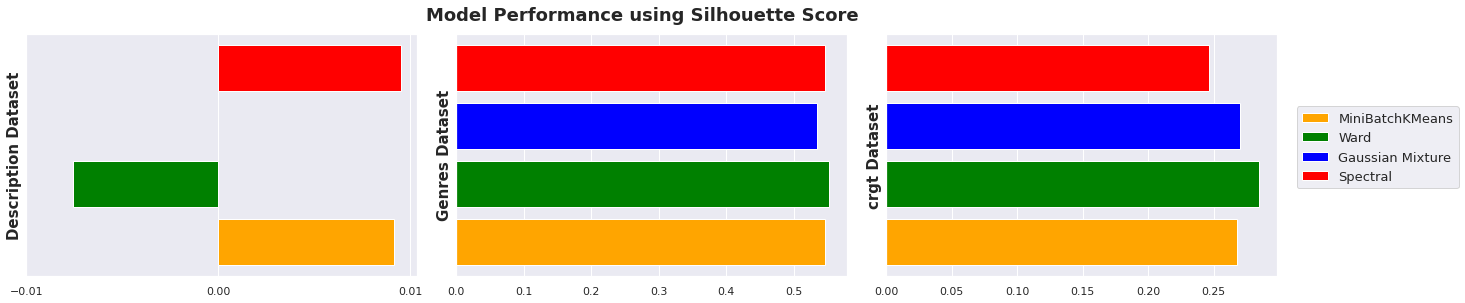

In [148]:
# Make the plot
plt.figure(figsize=(18,4))
# For Description dataset
plt.subplot(1,3,1)
plt.barh(0,silhouette_score(d, clusters_d), color='orange', label ='MiniBatchKMeans')
plt.barh(1,silhouette_score(d, w_clusters_d), color='green', label ='Ward')
plt.barh(2,0, color='blue', label ='Gaussian Mixture')
plt.barh(3,silhouette_score(d, s_clusters_d), color='red', label ='Spectral')

plt.ylabel('Description Dataset', fontweight ='bold', fontsize = 15)
plt.yticks([], [])
plt.xticks([-0.01,0,0.01])

# For Genres dataset
plt.subplot(1,3,2)
plt.barh(0,silhouette_score(genres, clusters_genres), color='orange', label ='MiniBatchKMeans')
plt.barh(1,silhouette_score(genres, w_clusters_genres), color='green', label ='Ward')
plt.barh(2,silhouette_score(genres, g_clusters_genres), color='blue', label ='Gaussian Mixture')
plt.barh(3,silhouette_score(genres, s_clusters_genres), color='red', label ='Spectral')

plt.ylabel('Genres Dataset', fontweight ='bold', fontsize = 15)
plt.yticks([], [])

# For crgt dataset
plt.subplot(1,3,3)
plt.barh(0,silhouette_score(crgt, clusters_crgt), color='orange', label ='MiniBatchKMeans')
plt.barh(1,silhouette_score(crgt, w_clusters_crgt), color='green', label ='Ward')
plt.barh(2,silhouette_score(crgt, g_clusters_crgt), color='blue', label ='Gaussian Mixture')
plt.barh(3,silhouette_score(crgt, s_clusters_crgt), color='red', label ='Spectral')

plt.ylabel('crgt Dataset', fontweight ='bold', fontsize = 15)
plt.yticks([], [])

plt.suptitle('Model Performance using Silhouette Score',fontweight ='bold', fontsize = 18,y=1.05)
plt.tight_layout()
plt.legend( fontsize = 13,bbox_to_anchor=(1.05, 0.7), loc='upper left', borderaxespad=0)
#plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0,fontsize=13)
plt.show()

Inference:  Ward gave best results for Genres and crgt dataset, while Spectral gave best results for Description dataset. K-Means gave the average results for all the datasets. Results of Gaussian were poor on most of the datasets.

# Similar content system

## A simple Recommendation system based on clusters
(using results of spectral clustering for similar description
and ward clustering for similar genres or similar local movies)

In [185]:
# Creating the soft recommendation dataset
main_df = df.copy()
main_df['d_clusters'] = s_clusters_d # Adding cluster numbers of similar content based on description alone to the df dataframe

main_df['genres_clusters'] = w_clusters_genres # Adding cluster numbers of similar content based on genres alone to the df dataframe

df_country_cleaned = df[df['country']!='no_country'] # Create a different dataset to store country related data
df_country_cleaned ['crgt_clusters'] = w_clusters_crgt # Adding cluster numbers of similar content based on country_rating_genre_type to the df_country_cleaned dataframe

main_df = main_df.merge(df_country_cleaned, how='left',on=df.columns.tolist())
main_df = main_df.dropna()
main_df['crgt_clusters'] = main_df['crgt_clusters'].astype(int)

In [191]:
# Build a recommendation/ similar content function using the recommendation dataset
def recommend_content(content_name):
  while True :
    content_name = content_name.title() # Capitalize each word, using title case
    print(" ")
    if content_name not in main_df['title'].tolist():
      print('Sorry, this content is not available on Netflix') # ***If the inputted content is not present in the dataset, print this line***
    else:
      # Results for similar local content
      local_rec = main_df[(main_df['title']!=content_name) & 
                (main_df['crgt_clusters']==main_df[main_df['title']==content_name]['crgt_clusters'].to_list()[0])
                ][['title','release_year','lead_country','duration','lead_actors','director','description']].sort_values('release_year',ascending=False)

      # Results of similar description content
      content_type =  main_df[main_df['title']==content_name]['type'].to_list()[0]
      plot_rec = main_df[(main_df['title']!=content_name) & (main_df['type']==content_type) &
                (main_df['d_clusters']==main_df[main_df['title']==content_name]['d_clusters'].to_list()[0]) 
                ][['title','release_year','lead_country','duration','lead_actors','director','description']].sort_values('release_year',ascending=False)

      # Results of similar genre content
      genre_rec = main_df[(main_df['title']!=content_name) &  (main_df['type']==content_type) &
                (main_df['genres_clusters']==main_df[main_df['title']==content_name]['genres_clusters'].to_list()[0])
                ][['title','release_year','lead_country','duration','lead_actors','director','description']].sort_values('release_year',ascending=False)

      # Print all the similar content
      print("***"*10)
      print(f"Top similar local {content_type}s are ...")
      print(" ")
      print(local_rec.set_index('title').head().to_markdown())
      print(" ")
      print("***"*10)

      print(" ")
      print(f"Top 5 {content_type}s with similar genres are...")
      print(" ")
      print(genre_rec.set_index('title').head().to_markdown())
      print(" ")
      print("***"*10)
      
      print(" ")
      print(f"You also may be interested in ...")
      print(" ")
      print(plot_rec.set_index('title').head().to_markdown())
      print(" ")
      print("***"*10)

      # Code to stop or one more try
      count=1
    try:
      if count>0:
        break
    except:
      pass

    count=0
    choice = input("Try the keywords again, yes/no? : ") # In case the user input is invalid, ask user if they wants to try again with the keywords
    if choice.lower()=='yes': 
      content_name = input("Search : ")
      count+=1
    else:
        break # If not 'yes' then break the loop

In [192]:
# Try the recommendation system
recommend_content('legiom')

 
Sorry, this content is not available on Netflix
Try the keywords again, yes/no? : yes
Search : legion
 
******************************
Top similar local Movies are ...
 
| title                  |   release_year | lead_country   | duration   | lead_actors                                        | director            | description                                                                                                                                            |
|:-----------------------|---------------:|:---------------|:-----------|:---------------------------------------------------|:--------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------|
| We Summon the Darkness |           2020 | United_States  | 90 min     | Alexandra_Daddario  Amy_Forsyth  Keean_Johnson     | Marc_Meyers         | A night at a 1980s heavy metal concert hits a grisly note when new friends 

In [193]:
# Try the recommendation system
recommend_content('13 reasons why')

 
******************************
Top similar local TV_Shows are ...
 
| title              |   release_year | lead_country   | duration   | lead_actors                                   | director    | description                                                                                                                                            |
|:-------------------|---------------:|:---------------|:-----------|:----------------------------------------------|:------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lupin              |           2021 | United_States  | 1 Season   | Omar_Sy  Ludivine_Sagnier  Clotilde_Hesme     | no_director | Inspired by the adventures of Arsène Lupin, gentleman thief Assane Diop sets out to avenge his father for an injustice inflicted by a wealthy family.  |
| Altered Carbon     |           2020 | United_States  | 2 Seasons  | Joel_

In [194]:
# Let's try out a comedy standup
recommend_content('A Russell Peters Christmas')

 
******************************
Top similar local Movies are ...
 
| title                                            |   release_year | lead_country   | duration   | lead_actors                                  | director            | description                                                                                                                                            |
|:-------------------------------------------------|---------------:|:---------------|:-----------|:---------------------------------------------|:--------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------|
| Pieces of a Woman                                |           2020 | Canada         | 128 min    | Vanessa_Kirby  Shia_LaBeouf  Ellen_Burstyn   | Kornél_Mundruczó    | A heartbreaking home birth leaves a woman grappling with the profound emotional fallout, isolated from her partner and 

##It's so good. It's like I am searching on actual Netflix, but with better search optimization like google.

# Conclusions
## Insights from EDA
1. Movies and TV Shows on Netflix are in ratio 7/3. And TV Shows have long way to catch upto the number of Movies.

2. From past five years, Netflix has shifted its focus towards TV shows. Number of movies added to Netflix reduced by 45% while number of TV Shows added increased by 70%.

3. Most content on Netflix is from United States followed by India and United Kingdom. Netflix has a little over 90% of its total Content from top 12 countries, countries are namely, United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany, Mexico, China and Australia. 

4. Netflix has a lot of Japanese and South Korean TV Shows than the countries' movies and opposite in case of India.

5. Jan Suter is the most featured director. Raul Campos and Jan Suter together directed 18 movies. We can observe some other great names such as Jay Chapman, Martin Scorsese and Steven Spielberg in top 20 directors list.

6. Anupam Kher is the most featured actor, who featured in 42 movies. Out of top 10 actors, 8 are Indians. It shows the impact of Indian actors on the World television industry. Some great names like Amitabh Bachchan, Shahrukh Khan, Akshay Kumar and Paresh Rawal are in top 10 active actors.

7. International movies is the top genre followed by Dramas and Comedies.

8. Most movies are of length ~90 mins while most TV Shows have only one season.

9. Most content o Netflix is rated for mature audience only

10. Most content has description length of ~140 words.

11. Life, young, new, family and man are the top 5 most occurring words from the complete vocabulary of description.

## Insights from Clustering 
####a. Clustering on description column alone (dataset name : d)
* We found 41 clusters with best separation using Spectral clustering with the silhouette score of 0.00949. The average cluster size is 189, while the largest cluster has 1323 items. 
* We found 28 clusters using MiniBatchKMeans clustering with the silhouette score of 0.00912. The average cluster size is 277, while the largest cluster has 2751 items. 

*  Ward and Gaussian Mixture clustering was unable to find optimal number clusters.

####b. Clustering on listed_in (referred as genres) column alone (dataset name : genres)
*  We found 42 clusters with best separation using Ward clustering with the silhouette score of 0.55162.  The average cluster size is 185, while the largest cluster has 367 items. 

* We found same number of optimal clusters with same average size using Spectral clustering but with the silhouette score of 0.54574. The largest cluster has 348 items. 

* We found same number of optimal clusters with same average size using MiniBatchKMeans clustering but with the silhouette score of 0.54572. The largest cluster has 521 items. 

* We found same number of optimal clusters with same average size using Gaussian Mixture clustering but with the silhouette score of 0.53462. The largest cluster has 366 items. 



####c. Clustering on lead_country, rating, listed_in and type columns (dataset name : crgt)
* We found 108 optimal clusters with best separation using Ward clustering with the silhouette score of 0.28438. The average cluster size is 67, while the largest cluster has 185 items. 

* We found same number of clusters with same average size using Gaussian Mixture clustering with the silhouette score of 0.26998. The largest cluster has 207 items.

*  We found same number of clusters with same average size using MiniBatchKMeans clustering with the silhouette score of 0.26778. The largest cluster has 205 items. 

* We found same number of clusters with same average size using Gaussian Mixture clustering with the silhouette score of 0.24653. The largest cluster has 856 items. 

d. The MiniBatchKMeans was the fastest clustering algorithm and it gave decent results on all the datasets. The ward clustering was the slowest clustering algorithm but it gave better results in terms of smoother cluster size and better cluster separation on genres and crgt dataset. For the description dataset, spectral clustering achieved the best results.

## similar_content system (a basic recommender system)
* We built a marvelous yet simple recommendation system based on results of Spectral clustering and Ward clustering.
* The system recommends top similar local content, top content with similar genre and top content that you may find interesting.
* The system works pretty good, so do check it out 🥲. 

## If you have some +ve ideas to improve this project then please comment them out in the comment section...
